In [1]:
ls

 Volume in drive C is Amadeus
 Volume Serial Number is EE3D-C9E7

 Directory of C:\Users\sfranze\OneDrive - Amadeus Workplace\OC\Proj7\Implementez_un_modele_de_scoring

14/02/2023  11:20 pm    <DIR>          .
14/02/2023  11:20 pm    <DIR>          ..
12/02/2023  06:08 pm    <DIR>          .idea
12/01/2023  08:31 pm    <DIR>          .ipynb_checkpoints
12/01/2023  08:01 pm            65,264 base_libs.txt
10/02/2023  10:58 am    <DIR>          Data
14/02/2023  11:20 pm         5,771,292 Proj7.ipynb
12/01/2023  09:06 pm            65,264 spec-file.txt
12/01/2023  08:33 pm               663 Untitled.ipynb
               4 File(s)      5,902,483 bytes
               5 Dir(s)  220,212,056,064 bytes free


In [2]:
import numpy as np
import pandas as pd
import gc
import time
from contextlib import contextmanager
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as msno
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
cd data\Projet_Mise_en_prod_home_credit_default_risk

C:\Users\sfranze\OneDrive - Amadeus Workplace\OC\Proj7\Implementez_un_modele_de_scoring\data\Projet_Mise_en_prod_home_credit_default_risk


In [4]:
ls

 Volume in drive C is Amadeus
 Volume Serial Number is EE3D-C9E7

 Directory of C:\Users\sfranze\OneDrive - Amadeus Workplace\OC\Proj7\Implementez_un_modele_de_scoring\data\Projet_Mise_en_prod_home_credit_default_risk

10/02/2023  11:40 am    <DIR>          .
10/02/2023  11:40 am    <DIR>          ..
30/12/2022  10:09 am        26,567,651 application_test.csv
30/12/2022  10:09 am       166,133,370 application_train.csv
30/12/2022  10:09 am       170,016,717 bureau.csv
30/12/2022  10:09 am       375,592,889 bureau_balance.csv
30/12/2022  10:09 am       424,582,605 credit_card_balance.csv
30/12/2022  10:09 am            37,383 HomeCredit_columns_description.csv
30/12/2022  10:09 am       723,118,349 installments_payments.csv
10/02/2023  11:40 am             5,005 install-pyenv-win.ps1
24/01/2023  06:57 am        11,525,288 lightgbm_pipeline.joblib
09/02/2023  07:01 pm           310,781 lightgbmodel.joblib
10/02/2023  11:00 am    <DIR>          MlflowLightgbm
30/12/2022  10:09 am       39

In [5]:
#import du dataset de train, que faire avec les autres? 
# ne pas les utiliser pour l'instant

### Import of Train dataset

In [6]:
train_with_target = pd.read_csv('application_train.csv', nrows= None)
train_with_target

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
0           24700.5  ...                 0                0                0   
1           35698.5  ...                 0                0                0   
2            6750.0  ...                 0                0                0   
3           29686.5  ...                 0                0                0   
4           21865.5  ...                 0                0                0   
...             ...  ...               ...              ...              ...   
307506      27558.0  ...                 0                0                0   
307507      12001.5  ...                 0                0                0   
307508      29979.0  ...                 0                0                0   
307509      20205.0  ...                 0                0                0   
307510      49117.5  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                     0                        0.0                       0.0   
1                     0                        0.0                       0.0   
2                     0                        0.0                       0.0   
3                     0                        NaN                       NaN   
4                     0                        0.0                       0.0   
...                 ...                        ...                       ...   
307506                0                        NaN                       NaN   
307507                0                        NaN                       NaN   
307508                0                        1.0                       0.0   
307509                0                        0.0                       0.0   
307510                0                        0.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                              0.0                        0.0   
1                              0.0                        0.0   
2                              0.0                        0.0   
3                              NaN                        NaN   
4                              

In [7]:
train_with_target.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [257]:
train_with_target.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

### Balance between 0 and 1 clients

In [8]:
train_with_target.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [9]:
good_clients_perc = train_with_target.TARGET.value_counts()[0]/len(train_with_target.TARGET)*100
bad_clients_perc = train_with_target.TARGET.value_counts()[1]/len(train_with_target.TARGET)*100
print (' The % of good client is:',good_clients_perc,'\n','The % of bad client is:', bad_clients_perc)

 The % of good client is: 91.92711805431351 
 The % of bad client is: 8.072881945686495


### Subset of data without target and ID

In [10]:
train = train_with_target.iloc[:,2:]
train

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0              Cash loans           M            N               Y   
1              Cash loans           F            N               N   
2         Revolving loans           M            Y               Y   
3              Cash loans           F            N               Y   
4              Cash loans           M            N               Y   
...                   ...         ...          ...             ...   
307506         Cash loans           M            N               N   
307507         Cash loans           F            N               Y   
307508         Cash loans           F            N               Y   
307509         Cash loans           F            N               Y   
307510         Cash loans           F            N               N   

        CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                  0          202500.0    406597.5      24700.5   
1                  0          270000.0   1293502.5      35698.5   
2                  0           67500.0    135000.0       6750.0   
3                  0          135000.0    312682.5      29686.5   
4                  0          121500.0    513000.0      21865.5   
...              ...               ...         ...          ...   
307506             0          157500.0    254700.0      27558.0   
307507             0           72000.0    269550.0      12001.5   
307508             0          153000.0    677664.0      29979.0   
307509             0          171000.0    370107.0      20205.0   
307510             0          157500.0    675000.0      49117.5   

        AMT_GOODS_PRICE NAME_TYPE_SUITE  ... FLAG_DOCUMENT_18  \
0              351000.0   Unaccompanied  ...                0   
1             1129500.0          Family  ...                0   
2              135000.0   Unaccompanied  ...                0   
3              297000.0   Unaccompanied  ...                0   
4              513000.0   Unaccompanied  ...                0   
...                 ...             ...  ...              ...   
307506         225000.0   Unaccompanied  ...                0   
307507         225000.0   Unaccompanied  ...                0   
307508         585000.0   Unaccompanied  ...                0   
307509         319500.0   Unaccompanied  ...                0   
307510         675000.0   Unaccompanied  ...                0   

       FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0                     0                0                0   
1                     0                0                0   
2                     0                0                0   
3                     0                0                0   
4                     0                0                0   
...                 ...              ...              ...   
307506                0                0                0   
307507                0                0                0   
307508                0                0                0   
307509                0                0                0   
307510                0                0                0   

        AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                              0.0                        0.0   
1                              0.0                        0.0   
2                              0.0                        0.0   
3                              NaN                        NaN   
4                              0.0                        0.0   
...                            ...                        ...   
307506                         NaN                        NaN   
307507                         NaN                        NaN   
307508                         1.0                        0.0   
307509                         0.0                        0.0   
307510                         0.0                        0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0

### Analysing null data

In [11]:
train.isnull().sum()  # .sort_values(ascending=False)

NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 120, dtype: int64

In [12]:
percent_nullval = pd.DataFrame(train_with_target.isnull().sum()/len(train_with_target))   # columns=['columns','percentage']    # .sort_values(ascending=False)
percent_nullval = percent_nullval.reset_index()
percent_nullval.columns = ['columns','percentage']
percent_nullval

columns  percentage
0                    SK_ID_CURR    0.000000
1                        TARGET    0.000000
2            NAME_CONTRACT_TYPE    0.000000
3                   CODE_GENDER    0.000000
4                  FLAG_OWN_CAR    0.000000
..                          ...         ...
117   AMT_REQ_CREDIT_BUREAU_DAY    0.135016
118  AMT_REQ_CREDIT_BUREAU_WEEK    0.135016
119   AMT_REQ_CREDIT_BUREAU_MON    0.135016
120   AMT_REQ_CREDIT_BUREAU_QRT    0.135016
121  AMT_REQ_CREDIT_BUREAU_YEAR    0.135016

[122 rows x 2 columns]

In [13]:
list_cols =  percent_nullval['columns'].tolist()
list_cols

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

### Import description of columns csv to properly analyse them

In [14]:
column_descr = pd.read_csv('HomeCredit_columns_description.csv', nrows= None, encoding= 'ansi')
column_descr

Unnamed: 0                         Table                    Row  \
0             1  application_{train|test}.csv             SK_ID_CURR   
1             2  application_{train|test}.csv                 TARGET   
2             5  application_{train|test}.csv     NAME_CONTRACT_TYPE   
3             6  application_{train|test}.csv            CODE_GENDER   
4             7  application_{train|test}.csv           FLAG_OWN_CAR   
..          ...                           ...                    ...   
214         217     installments_payments.csv  NUM_INSTALMENT_NUMBER   
215         218     installments_payments.csv        DAYS_INSTALMENT   
216         219     installments_payments.csv     DAYS_ENTRY_PAYMENT   
217         220     installments_payments.csv         AMT_INSTALMENT   
218         221     installments_payments.csv            AMT_PAYMENT   

                                           Description  \
0                             ID of loan in our sample   
1    Target variable (1 - client with payment diffi...   
2          Identification if loan is cash or revolving   
3                                 Gender of the client   
4                        Flag if the client owns a car   
..                                                 ...   
214            On which installment we observe payment   
215  When the installment of previous credit was su...   
216  When was the installments of previous credit p...   
217  What was the prescribed installment amount of ...   
218  What the client actually paid on previous cred...   

                                   Special  
0                                      NaN  
1                                      NaN  
2                                      NaN  
3                                      NaN  
4                                      NaN  
..                                     ...  
214                                    NaN  
215  time only relative to the application  
216  time only relative to the application  
217                                    NaN  
218                                    NaN  

[219 rows x 5 columns]

In [15]:
column_descr_subset = column_descr[(column_descr['Table'] == 'application_{train|test}.csv')]
column_descr_subset

Unnamed: 0                         Table                         Row  \
0             1  application_{train|test}.csv                  SK_ID_CURR   
1             2  application_{train|test}.csv                      TARGET   
2             5  application_{train|test}.csv          NAME_CONTRACT_TYPE   
3             6  application_{train|test}.csv                 CODE_GENDER   
4             7  application_{train|test}.csv                FLAG_OWN_CAR   
..          ...                           ...                         ...   
117         120  application_{train|test}.csv   AMT_REQ_CREDIT_BUREAU_DAY   
118         121  application_{train|test}.csv  AMT_REQ_CREDIT_BUREAU_WEEK   
119         122  application_{train|test}.csv   AMT_REQ_CREDIT_BUREAU_MON   
120         123  application_{train|test}.csv   AMT_REQ_CREDIT_BUREAU_QRT   
121         124  application_{train|test}.csv  AMT_REQ_CREDIT_BUREAU_YEAR   

                                           Description Special  
0                             ID of loan in our sample     NaN  
1    Target variable (1 - client with payment diffi...     NaN  
2          Identification if loan is cash or revolving     NaN  
3                                 Gender of the client     NaN  
4                        Flag if the client owns a car     NaN  
..                                                 ...     ...  
117  Number of enquiries to Credit Bureau about the...     NaN  
118  Number of enquiries to Credit Bureau about the...     NaN  
119  Number of enquiries to Credit Bureau about the...     NaN  
120  Number of enquiries to Credit Bureau about the...     NaN  
121  Number of enquiries to Credit Bureau about the...     NaN  

[122 rows x 5 columns]

In [16]:
column_descr_subset.loc[column_descr_subset['Row'].isin(list_cols)]['Description'].tolist()

['ID of loan in our sample',
 'Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)',
 'Identification if loan is cash or revolving',
 'Gender of the client',
 'Flag if the client owns a car',
 'Flag if client owns a house or flat',
 'Number of children the client has',
 'Income of the client',
 'Credit amount of the loan',
 'Loan annuity',
 'For consumer loans it is the price of the goods for which the loan is given',
 'Who was accompanying client when he was applying for the loan',
 'Clients income type (businessman, working, maternity leave,…)',
 'Level of highest education the client achieved',
 'Family status of the client',
 'What is the housing situation of the client (renting, living with parents, ...)',
 'Normalized population of region where client lives (higher number means the client lives in more populated region)',
 "Client's age in days a

In [17]:
percent_nullval["description"] = column_descr_subset.loc[column_descr_subset['Row'].isin(list_cols)]['Description'].tolist()
percent_nullval.sort_values(by = 'percentage', ascending=False)

columns  percentage  \
76           COMMONAREA_MEDI    0.698723   
48            COMMONAREA_AVG    0.698723   
62           COMMONAREA_MODE    0.698723   
70  NONLIVINGAPARTMENTS_MODE    0.694330   
56   NONLIVINGAPARTMENTS_AVG    0.694330   
..                       ...         ...   
15         NAME_HOUSING_TYPE    0.000000   
14        NAME_FAMILY_STATUS    0.000000   
13       NAME_EDUCATION_TYPE    0.000000   
12          NAME_INCOME_TYPE    0.000000   
0                 SK_ID_CURR    0.000000   

                                          description  
76  Normalized information about building where th...  
48  Normalized information about building where th...  
62  Normalized information about building where th...  
70  Normalized information about building where th...  
56  Normalized information about building where th...  
..                                                ...  
15  What is the housing situation of the client (r...  
14                        Family status of the client  
13     Level of highest education the client achieved  
12  Clients income type (businessman, working, mat...  
0                            ID of loan in our sample  

[122 rows x 3 columns]

### Own car analysis

In [18]:
# analyse flag own car with own car age
train.loc[train['FLAG_OWN_CAR']== 'Y']['OWN_CAR_AGE'].isnull().sum() #just 5 on 104578 clients who owns a car has this missing value

5

In [19]:
train.loc[train['FLAG_OWN_CAR']== 'N']['OWN_CAR_AGE'].isnull().sum()   # 100% of own car = NO

202924

### Choosing columns to drop

In [20]:
to_drop = ['ENTRANCES_MEDI',
           'ENTRANCES_MODE',
           'ENTRANCES_AVG',
           'APARTMENTS_MODE',
           'APARTMENTS_MEDI',
           'APARTMENTS_AVG',
           'HOUSETYPE_MODE',
           'TOTALAREA_MODE',
           'HOUSETYPE_MODE',
    'NONLIVINGAREA_MODE',
           'CNT_CHILDREN',
           'NONLIVINGAREA_AVG',
           'NONLIVINGAREA_MEDI',
           'LIVINGAREA_MEDI',
           'LIVINGAREA_MODE',
           'LIVINGAREA_AVG',
           'FLOORSMIN_AVG',
           'FLAG_EMP_PHONE',
           'FLOORSMIN_MEDI',
           'FLOORSMIN_MODE',
           'FLOORSMAX_MEDI',
           'HOUR_APPR_PROCESS_START',
           'NAME_TYPE_SUITE',
           'FLOORSMAX_AVG',
           'FLOORSMAX_MODE',
           'FONDKAPREMONT_MODE',
    'DAYS_LAST_PHONE_CHANGE',
    'YEARS_BEGINEXPLUATATION_MEDI',
           'YEARS_BEGINEXPLUATATION_AVG',
           'YEARS_BEGINEXPLUATATION_MEDI',
           'YEARS_BEGINEXPLUATATION_MODE',
           'TOTALAREA_MODE',
           'EMERGENCYSTATE_MODE',
           'COMMONAREA_MODE',
           'FLAG_DOCUMENT_3',
           'FLAG_DOCUMENT_4',
           'FLAG_DOCUMENT_5',
           'FLAG_DOCUMENT_6',
           'FLAG_DOCUMENT_7',
           'FLAG_DOCUMENT_8',
           'FLAG_DOCUMENT_9',
           'FLAG_DOCUMENT_10',
           'FLAG_DOCUMENT_11',
           'FLAG_DOCUMENT_12',
           'FLAG_DOCUMENT_13',
           'FLAG_DOCUMENT_14',
           'FLAG_DOCUMENT_15',
           'FLAG_DOCUMENT_16',
           'FLAG_DOCUMENT_17',
           'FLAG_DOCUMENT_18',
           'FLAG_DOCUMENT_19',
           'FLAG_DOCUMENT_20',
           'FLAG_DOCUMENT_21',
           'COMMONAREA_MEDI',
           'COMMONAREA_AVG',
           'NONLIVINGAPARTMENTS_MEDI',
           'NONLIVINGAPARTMENTS_AVG',
           'NONLIVINGAPARTMENTS_MODE',
           'LIVINGAPARTMENTS_AVG',
           'LIVINGAPARTMENTS_MEDI',
           'LIVINGAPARTMENTS_MODE',
           'YEARS_BUILD_AVG',
           'YEARS_BUILD_MEDI',
           'YEARS_BUILD_MODE',
           'LANDAREA_MEDI',
           'LANDAREA_AVG',
           'BASEMENTAREA_MEDI',
           'BASEMENTAREA_AVG',
           'AMT_GOODS_PRICE',
           'ELEVATORS_AVG',
           'ELEVATORS_MEDI',
           'WALLSMATERIAL_MODE',
           'REGION_RATING_CLIENT_W_CITY',
           'LIVE_REGION_NOT_WORK_REGION',
           'LIVE_CITY_NOT_WORK_CITY',
           'DEF_30_CNT_SOCIAL_CIRCLE',
           'OBS_30_CNT_SOCIAL_CIRCLE',
           'OWN_CAR_AGE'
           ]

In [21]:
train_slim = train.drop(columns=to_drop)
train_slim

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0              Cash loans           M            N               Y   
1              Cash loans           F            N               N   
2         Revolving loans           M            Y               Y   
3              Cash loans           F            N               Y   
4              Cash loans           M            N               Y   
...                   ...         ...          ...             ...   
307506         Cash loans           M            N               N   
307507         Cash loans           F            N               Y   
307508         Cash loans           F            N               Y   
307509         Cash loans           F            N               Y   
307510         Cash loans           F            N               N   

        AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY      NAME_INCOME_TYPE  \
0               202500.0    406597.5      24700.5               Working   
1               270000.0   1293502.5      35698.5         State servant   
2                67500.0    135000.0       6750.0               Working   
3               135000.0    312682.5      29686.5               Working   
4               121500.0    513000.0      21865.5               Working   
...                  ...         ...          ...                   ...   
307506          157500.0    254700.0      27558.0               Working   
307507           72000.0    269550.0      12001.5             Pensioner   
307508          153000.0    677664.0      29979.0               Working   
307509          171000.0    370107.0      20205.0  Commercial associate   
307510          157500.0    675000.0      49117.5  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  ...  \
0       Secondary / secondary special  Single / not married  ...   
1                    Higher education               Married  ...   
2       Secondary / secondary special  Single / not married  ...   
3       Secondary / secondary special        Civil marriage  ...   
4       Secondary / secondary special  Single / not married  ...   
...                               ...                   ...  ...   
307506  Secondary / secondary special             Separated  ...   
307507  Secondary / secondary special                 Widow  ...   
307508               Higher education             Separated  ...   
307509  Secondary / secondary special               Married  ...   
307510               Higher education               Married  ...   

       LANDAREA_MODE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
0             0.0377                       2.0                       2.0   
1             0.0128                       1.0                       0.0   
2                NaN                       0.0                       0.0   
3                NaN                       2.0                       0.0   
4                NaN                       0.0                       0.0   
...              ...                       ...                       ...   
307506        0.0094                       0.0                       0.0   
307507        0.0592                       0.0                       0.0   
307508           NaN                       6.0                       0.0   
307509           NaN                       0.0                       0.0   
307510           NaN                       0.0                       0.0   

        FLAG_DOCUMENT_2  AMT_REQ_CREDIT_BUREAU_HOUR  \
0                     0                         0.0   
1                     0                         0.0   
2                     0                         0.0   
3                     0                         NaN   
4                     0                         0.0   
...                 ...                         ...   
307506                0                         NaN   
307507                0                         NaN   
307508                0                 

<AxesSubplot:>

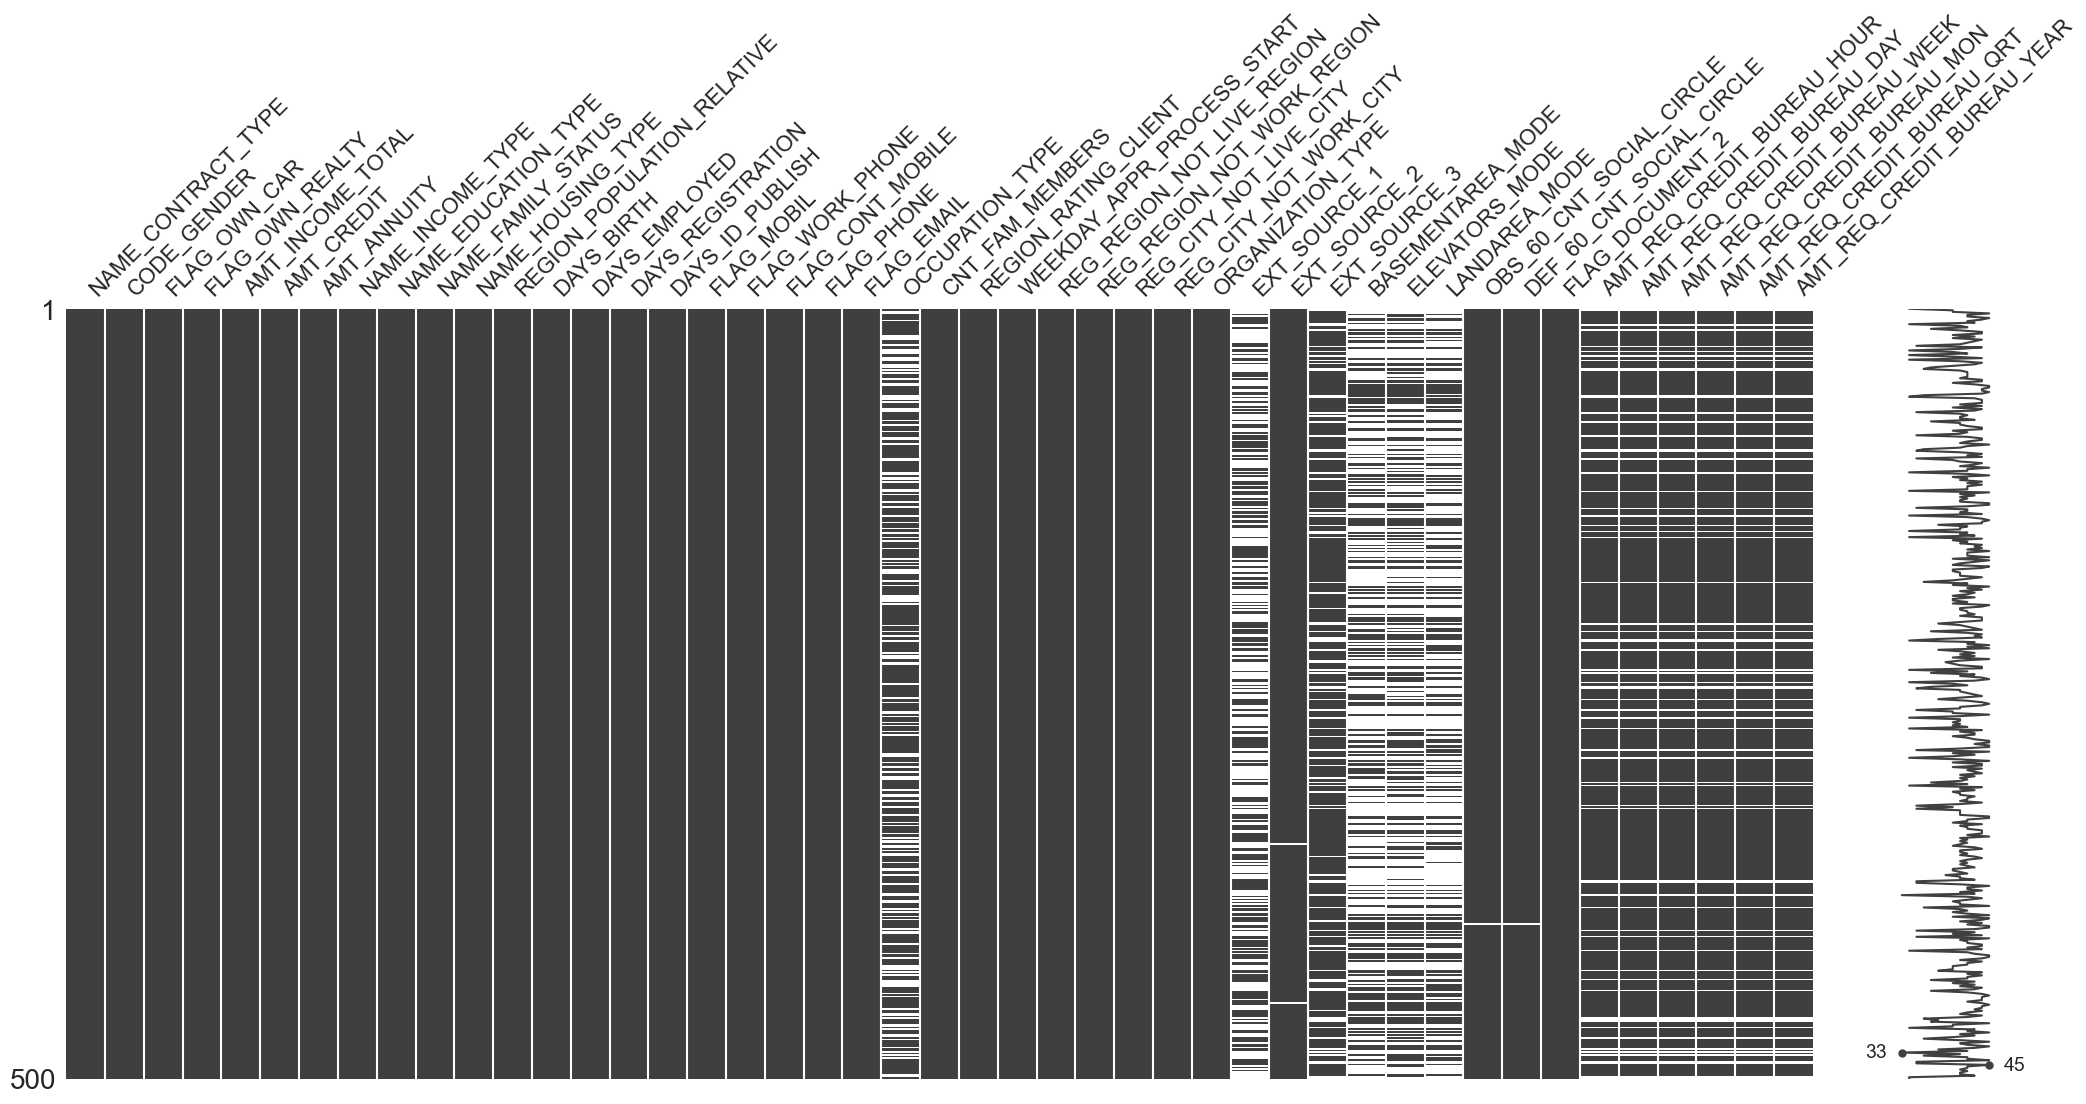

In [22]:
msno.matrix(train_slim.sample(500))

### Correlation between features

In [23]:
corr = train_slim.corr()
corr

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
AMT_INCOME_TOTAL                    1.000000    0.156870     0.191657   
AMT_CREDIT                          0.156870    1.000000     0.770138   
AMT_ANNUITY                         0.191657    0.770138     1.000000   
REGION_POPULATION_RELATIVE          0.074796    0.099738     0.118429   
DAYS_BIRTH                          0.027261   -0.055436     0.009445   
DAYS_EMPLOYED                      -0.064223   -0.066838    -0.104332   
DAYS_REGISTRATION                   0.027805    0.009621     0.038514   
DAYS_ID_PUBLISH                     0.008506   -0.006575     0.011268   
FLAG_MOBIL                          0.000325    0.001436     0.000149   
FLAG_WORK_PHONE                    -0.017193   -0.021085    -0.024803   
FLAG_CONT_MOBILE                   -0.008290    0.023653     0.022350   
FLAG_PHONE                          0.000159    0.026213     0.010802   
FLAG_EMAIL                          0.038378    0.016632     0.071709   
CNT_FAM_MEMBERS                     0.016342    0.063160     0.075539   
REGION_RATING_CLIENT               -0.085465   -0.101776    -0.128525   
REG_REGION_NOT_LIVE_REGION          0.031191    0.024010     0.041299   
REG_REGION_NOT_WORK_REGION          0.062340    0.051929     0.079420   
REG_CITY_NOT_LIVE_CITY              0.003574   -0.026886    -0.006214   
REG_CITY_NOT_WORK_CITY              0.006431   -0.018856     0.000896   
EXT_SOURCE_1                        0.026232    0.168429     0.119398   
EXT_SOURCE_2                        0.060925    0.131228     0.125804   
EXT_SOURCE_3                       -0.030229    0.043516     0.030752   
BASEMENTAREA_MODE                   0.012821    0.031213     0.034443   
ELEVATORS_MODE                      0.041032    0.074740     0.093131   
LANDAREA_MODE                      -0.003674    0.002532     0.003621   
OBS_60_CNT_SOCIAL_CIRCLE           -0.013015    0.000239    -0.011731   
DEF_60_CNT_SOCIAL_CIRCLE           -0.013135   -0.023767    -0.024001   
FLAG_DOCUMENT_2                    -0.001000    0.008905     0.003397   
AMT_REQ_CREDIT_BUREAU_HOUR          0.000709   -0.003906     0.003861   
AMT_REQ_CREDIT_BUREAU_DAY           0.002944    0.004238     0.002185   
AMT_REQ_CREDIT_BUREAU_WEEK          0.002387   -0.001275     0.013881   
AMT_REQ_CREDIT_BUREAU_MON           0.024700    0.054451     0.039148   
AMT_REQ_CREDIT_BUREAU_QRT           0.004859    0.015925     0.010124   
AMT_REQ_CREDIT_BUREAU_YEAR          0.011690   -0.048448    -0.011320   

                            REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
AMT_INCOME_TOTAL                              0.074796    0.027261   
AMT_CREDIT                                    0.099738   -0.055436   
AMT_ANNUITY                                   0.118429    0.009445   
REGION_POPULATION_RELATIVE                    1.000000   -0.029582   
DAYS_BIRTH                                   -0.029582    1.000000   
DAYS_EMPLOYED                                -0.003980   -0.615864   
DAYS_REGISTRATION                            -0.053820    0.331912   
DAYS_ID_PUBLISH                              -0.003993    0.272691   
FLAG_MOBIL                                    0.001333   -0.003084   
FLAG_WORK_PHONE                              -0.015628    0.172457   
FLAG_CONT_MOBILE                             -0.012478   -0.014985   
FLAG_PHONE                                    0.090939   -0.042402   
FLAG_EMAIL                                    0.040012    0.088208   
CNT_FAM_MEMBERS                              -0.024209    0.278894   
REGION_RATING_CLIENT                         -0.532877    0.009361   
REG_REGION_NOT_LIVE_REGION                    0.002118    0.065486   
REG_REGION_NOT_WORK_REGION                    0.056944    0.095819   
REG_CITY_NOT_LIVE_CITY                       -0.050499    0.180382   
REG_CITY_NOT_WORK_CITY                       -0.044057    0.242401   
EXT_SOURCE_1                                  0.099997   -0.600610   
EX

<AxesSubplot:>

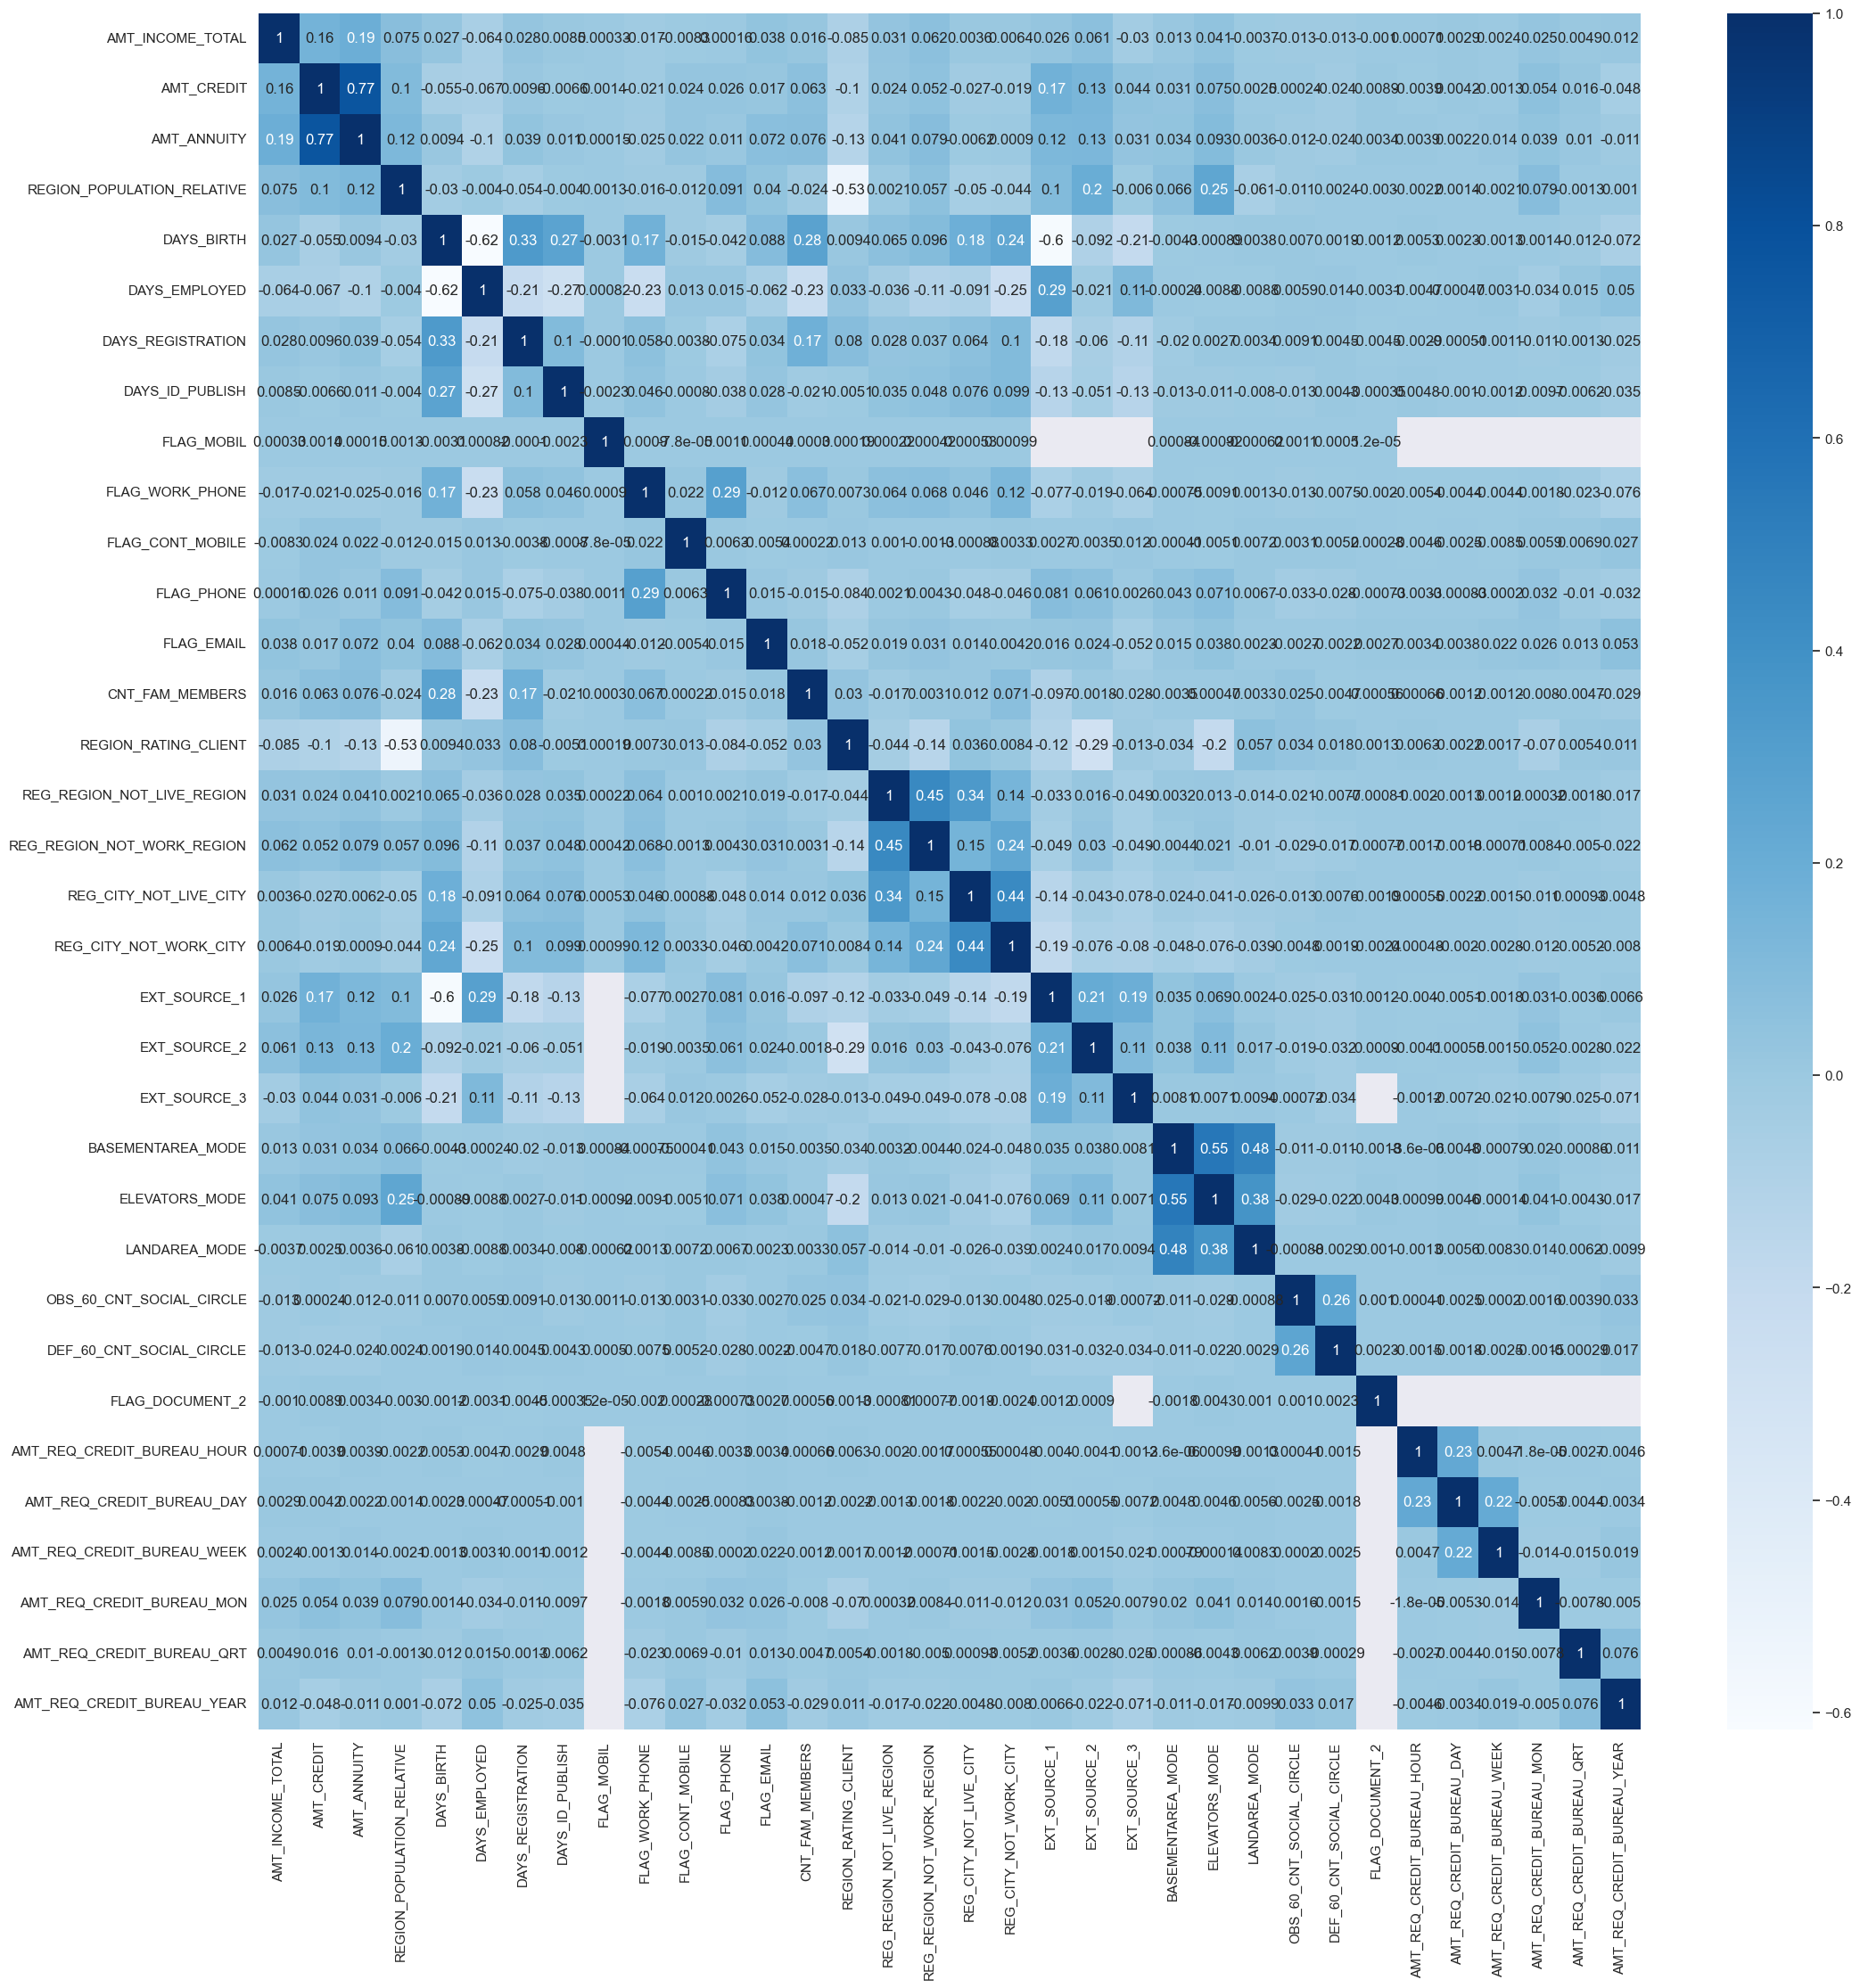

In [24]:
sns.set(rc={'figure.figsize':(25,25)})
sns.heatmap(corr, cmap="Blues", annot=True)

In [25]:
train_slim.isnull().sum()

NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                    2
REGION_RATING_CLIENT               0
WEEKDAY_APPR_PROCESS_START         0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
R

### Substitution of nan with 0 in selected columns

In [26]:
train_slim = train_slim.fillna({'EXT_SOURCE_1':0,
'EXT_SOURCE_2':0,
'EXT_SOURCE_3':0,
'BASEMENTAREA_MODE':0,
'ELEVATORS_MODE':0,
'LANDAREA_MODE':0})

train_slim.isnull().sum()

# 'YEARS_BUILD_MODE':0,
# 'COMMONAREA_MODE':0,
# 'LIVINGAPARTMENTS_MODE':0,
# 'NONLIVINGAPARTMENTS_MODE':0})

NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      12
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
FLAG_MOBIL                        0
FLAG_WORK_PHONE                   0
FLAG_CONT_MOBILE                  0
FLAG_PHONE                        0
FLAG_EMAIL                        0
OCCUPATION_TYPE               96391
CNT_FAM_MEMBERS                   2
REGION_RATING_CLIENT              0
WEEKDAY_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION        0
REG_REGION_NOT_WORK_REGION        0
REG_CITY_NOT_LIVE_CITY      

### Substitution of other columns nans with mode

In [27]:
train_slim['CNT_FAM_MEMBERS'] = train_slim['CNT_FAM_MEMBERS'].fillna(train_slim['CNT_FAM_MEMBERS'].mode()[0])
train_slim['OCCUPATION_TYPE'] = train_slim['OCCUPATION_TYPE'].fillna(train_slim['OCCUPATION_TYPE'].mode()[0])
train_slim['OBS_60_CNT_SOCIAL_CIRCLE'] = train_slim['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(train_slim['OBS_60_CNT_SOCIAL_CIRCLE'].mode()[0])
train_slim['DEF_60_CNT_SOCIAL_CIRCLE'] = train_slim['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(train_slim['DEF_60_CNT_SOCIAL_CIRCLE'].mode()[0])
train_slim[['AMT_ANNUITY','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']] = train_slim[['AMT_ANNUITY','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].fillna(train_slim[['AMT_ANNUITY','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].median())

In [29]:
train_slim.isnull().sum()

NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
DAYS_REGISTRATION             0
DAYS_ID_PUBLISH               0
FLAG_MOBIL                    0
FLAG_WORK_PHONE               0
FLAG_CONT_MOBILE              0
FLAG_PHONE                    0
FLAG_EMAIL                    0
OCCUPATION_TYPE               0
CNT_FAM_MEMBERS               0
REGION_RATING_CLIENT          0
WEEKDAY_APPR_PROCESS_START    0
REG_REGION_NOT_LIVE_REGION    0
REG_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY        0
REG_CITY_NOT_WORK_CITY        0
ORGANIZATION_TYPE             0
EXT_SOURCE_1                  0
EXT_SOUR

### Application of kaggle Kernel

In [30]:
# extraction of kernel functions to use as first steps

@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(title, time.time() - t0))

# One-hot encoding for categorical columns with get_dummies
def one_hot_encoder(df, nan_as_category = True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

# Preprocess application_train.csv
# edit: modify this function to apply it at train dataset then eventually re use it when I need to split it in train and test , not in the first moment
def application_train(num_rows = None, nan_as_category = False):
    # Read data and merge
    # train_df = pd.read_csv('application_train.csv', nrows= num_rows)
    df = train_slim   # change name of assigned df based on needs, train_with_target is the untouched one
    
    print("Train samples: {}".format(len(df)))
    # Optional: Remove 4 applications with XNA CODE_GENDER (train set)
    # df = df[df['CODE_GENDER'] != 'XNA']
    
    # Categorical features with Binary encode (0 or 1; two categories)
    for bin_feature in ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']:
        df[bin_feature], uniques = pd.factorize(df[bin_feature])
    # Categorical features with One-Hot encode
    df, cat_cols = one_hot_encoder(df, nan_as_category)
    
    # NaN values for DAYS_EMPLOYED: 365.243 -> nan
    df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace= True)
    # Some simple new features (percentages)
    df['DAYS_EMPLOYED_PERC'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
    df['INCOME_CREDIT_PERC'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']
    df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
    df['ANNUITY_INCOME_PERC'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
    df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']
    gc.collect()
    return df

In [31]:
train_feat_eng = application_train()

Train samples: 307511


In [32]:
# applicatin partie modeles, diviser le dataset en train et test et validation 

# recherche des hyperparametres par exemple avec grid search cv, faire la cross validation 

# light gbm a tester, regression logistique, random forest
train_feat_eng.drop(['DAYS_EMPLOYED','DAYS_BIRTH','AMT_INCOME_TOTAL','CNT_FAM_MEMBERS','AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT'], inplace=True, axis=1)

In [33]:
train_feat_eng.isnull().sum()   # .describe()

CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
REGION_POPULATION_RELATIVE        0
DAYS_REGISTRATION                 0
                              ...  
DAYS_EMPLOYED_PERC            55374
INCOME_CREDIT_PERC                0
INCOME_PER_PERSON                 0
ANNUITY_INCOME_PERC               0
PAYMENT_RATE                      0
Length: 146, dtype: int64

In [34]:
# to further explore this choice
# train_feat_eng['DAYS_EMPLOYED'] = train_feat_eng['DAYS_EMPLOYED'].fillna(train_feat_eng['DAYS_EMPLOYED'].mode()[0])
train_feat_eng['DAYS_EMPLOYED_PERC'] = train_feat_eng['DAYS_EMPLOYED_PERC'].fillna(train_feat_eng['DAYS_EMPLOYED_PERC'].median())

In [35]:
train_feat_eng.shape

(307511, 146)

### Separation in X and y set, train-test-split

In [36]:
#! pip install imblearn

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from functools import partial
from sklearn.feature_selection import mutual_info_classif, SelectKBest, f_classif

In [38]:
X = train_feat_eng # .iloc[:,2:] not necessary now because I've already removed the target at the beginning
y = train_with_target['TARGET']
features_cols = X.columns
X

CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0                 0             0                0   
1                 1             0                1   
2                 0             1                0   
3                 1             0                0   
4                 0             0                0   
...             ...           ...              ...   
307506            0             0                1   
307507            1             0                0   
307508            1             0                0   
307509            1             0                0   
307510            1             0                1   

        REGION_POPULATION_RELATIVE  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0                         0.018801            -3648.0            -2120   
1                         0.003541            -1186.0             -291   
2                         0.010032            -4260.0            -2531   
3                         0.008019            -9833.0            -2437   
4                         0.028663            -4311.0            -3458   
...                            ...                ...              ...   
307506                    0.032561            -8456.0            -1982   
307507                    0.025164            -4388.0            -4090   
307508                    0.005002            -6737.0            -5150   
307509                    0.005313            -2562.0             -931   
307510                    0.046220            -5128.0             -410   

        FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  ...  \
0                1                0                 1           1  ...   
1                1                0                 1           1  ...   
2                1                1                 1           1  ...   
3                1                0                 1           0  ...   
4                1                0                 1           0  ...   
...            ...              ...               ...         ...  ...   
307506           1                0                 1           0  ...   
307507           1                0                 1           1  ...   
307508           1                0                 1           0  ...   
307509           1                0                 1           0  ...   
307510           1                1                 1           1  ...   

        ORGANIZATION_TYPE_Transport: type 2  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   
...                                     ...   
307506                                    0   
307507                                    0   
307508                                    0   
307509                                    0   
307510                                    0   

        ORGANIZATION_TYPE_Transport: type 3  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   
...                                     ...   
307506                                    0   
307507                                    0   
307508                                    0   
307509                                    0   
307510                                    0   

        ORGANIZATION_TYPE_Transport: type 4  ORGANIZATION_TYPE_University  \
0                                         0                             0   
1                                         0                             0   
2                                         0                             0   
3                                         0                             0   
4                                         0                       

### Select k best features directly from X and Y

In [39]:
# Create and fit selector
selectorr = SelectKBest(f_classif, k=90)
selectorr.fit(X,y)
# Get columns to keep and create new dataframe with those only
cols = selectorr.get_support(indices=True)
X_new = X.iloc[:,cols]
X_new

CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0                 0             0                0   
1                 1             0                1   
2                 0             1                0   
3                 1             0                0   
4                 0             0                0   
...             ...           ...              ...   
307506            0             0                1   
307507            1             0                0   
307508            1             0                0   
307509            1             0                0   
307510            1             0                1   

        REGION_POPULATION_RELATIVE  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0                         0.018801            -3648.0            -2120   
1                         0.003541            -1186.0             -291   
2                         0.010032            -4260.0            -2531   
3                         0.008019            -9833.0            -2437   
4                         0.028663            -4311.0            -3458   
...                            ...                ...              ...   
307506                    0.032561            -8456.0            -1982   
307507                    0.025164            -4388.0            -4090   
307508                    0.005002            -6737.0            -5150   
307509                    0.005313            -2562.0             -931   
307510                    0.046220            -5128.0             -410   

        FLAG_WORK_PHONE  FLAG_PHONE  REGION_RATING_CLIENT  \
0                     0           1                     2   
1                     0           1                     1   
2                     1           1                     2   
3                     0           0                     2   
4                     0           0                     2   
...                 ...         ...                   ...   
307506                0           0                     1   
307507                0           1                     2   
307508                0           0                     3   
307509                0           0                     2   
307510                1           1                     1   

        REG_REGION_NOT_LIVE_REGION  ...  ORGANIZATION_TYPE_Trade: type 6  \
0                                0  ...                                0   
1                                0  ...                                0   
2                                0  ...                                0   
3                                0  ...                                0   
4                                0  ...                                0   
...                            ...  ...                              ...   
307506                           0  ...                                0   
307507                           0  ...                                0   
307508                           0  ...                                0   
307509                           0  ...                                0   
307510                           0  ...                                0   

        ORGANIZATION_TYPE_Trade: type 7  ORGANIZATION_TYPE_Transport: type 3  \
0                                     0                                    0   
1                                     0                                    0   
2                                     0                                    0   
3                                     0                                    0   
4                                     0                                    0   
...                                 ...                                  ...   
307506                                0                                    0   
307507                                0                                    0   
307508                                0                                    0   
307509                  

In [40]:
# X_new = SelectKBest(mutual_info_classif, k = 80).fit_transform(X,y)
features_colss = X_new.columns
X_new.shape

(307511, 90)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y,
                                                    test_size = 0.3,
                                                    random_state = 6)

In [42]:
X_train.shape, X_test.shape

((215257, 90), (92254, 90))

### Scaling data with StandardScaler

In [43]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[ 0.71977446, -0.71987857,  1.50367051, ..., -0.02935865,
         0.46189274, -1.1622507 ],
       [ 0.71977446, -0.71987857, -0.66503931, ...,  1.17769075,
        -1.24375697, -0.51070176],
       [-1.38915187,  1.38912316, -0.66503931, ..., -0.37135598,
        -0.85292657,  0.05408736],
       ...,
       [ 0.71977446,  1.38912316, -0.66503931, ..., -0.1299461 ,
        -0.30286775, -0.23775181],
       [-1.38915187,  1.38912316, -0.66503931, ..., -0.43170845,
         1.26064762, -0.10699927],
       [ 0.71977446, -0.71987857,  1.50367051, ..., -0.49206092,
        -1.45026956, -0.6451812 ]])

In [44]:
X_test_scaled

array([[ 0.71977446, -0.71987857, -0.66503931, ..., -0.16347525,
        -0.60612794,  1.70989857],
       [ 0.71977446,  1.38912316, -0.66503931, ..., -0.00924116,
        -0.50997375, -0.74657241],
       [ 0.71977446, -0.71987857, -0.66503931, ...,  0.17181625,
        -0.08536408, -0.24959748],
       ...,
       [ 0.71977446, -0.71987857, -0.66503931, ...,  0.81557593,
        -0.669904  ,  1.14618343],
       [ 0.71977446,  1.38912316,  1.50367051, ..., -0.43170845,
         1.17868337, -1.08875262],
       [-1.38915187,  1.38912316, -0.66503931, ..., -0.43170845,
        -1.2968134 , -0.16517623]])

### MODEL SELECTION smote + model inside pipeline to handle imbalanced dataset

### Logistic regression

In [78]:
# remember to add time calculations for each model

In [79]:
# parameter grid
params1 = {'verbose': [2],
    'classification__penalty' : ['l1', 'l2'],
           'classification__C' : np.logspace(-4, 4, 20),
           'classification__solver' : ['liblinear']}

    #   { 'classification__penalty' : ['l1','l2'],        'classification__C'  : np.logspace(-3,3,7),       'classification__solver'  : ['saga','lbfgs', 'liblinear']  }

In [80]:
logisticmodel = Pipeline([
    ('sampling', SMOTE(sampling_strategy=0.20)),
    ('classification', LogisticRegression())
])

grid1 = GridSearchCV(logisticmodel, param_grid = params1, scoring = 'roc_auc')
grid1.fit(X_train_scaled, y_train)

[Pipeline] .......... (step 1 of 2) Processing sampling, total=   5.8s
[Pipeline] .... (step 2 of 2) Processing classification, total=   0.8s


KeyboardInterrupt: 

In [ ]:
logisticmodel.get_params().keys()

In [ ]:
grid1.best_params_

#### Logistic Regression score

In [ ]:
grid1.best_score_

In [ ]:
grid1.best_estimator_.score(X_test_scaled,y_test)

### Lightgbm

In [81]:
params2 = {'verbose':[2],
    'classification__learning_rate': [0.2,0.3,0.4],
           'classification__max_depth': [1,3,5],
           'classification__n_estimators':[100,300],
           'classification__num_leaves': [20,31],
           'classification__subsample': [0.4,0.8]}

In [82]:
lightgbmodel = Pipeline([
    ('sampling', SMOTE(sampling_strategy=0.25)),    # rajouter ............... SMOTE(sampling_strategy=0.20) sinon trop violent reequilibre
    ('classification', lgb.LGBMClassifier())
])

grid2 = GridSearchCV(lightgbmodel, params2, scoring = 'roc_auc')
grid2.fit(X_train_scaled, y_train)

[Pipeline] .......... (step 1 of 2) Processing sampling, total=   5.7s
[Pipeline] .... (step 2 of 2) Processing classification, total=   3.1s
[Pipeline] .......... (step 1 of 2) Processing sampling, total=   5.7s
[Pipeline] .... (step 2 of 2) Processing classification, total=   1.8s
[Pipeline] .......... (step 1 of 2) Processing sampling, total=   4.7s
[Pipeline] .... (step 2 of 2) Processing classification, total=   2.6s
[Pipeline] .......... (step 1 of 2) Processing sampling, total=   4.3s
[Pipeline] .... (step 2 of 2) Processing classification, total=   2.5s
[Pipeline] .......... (step 1 of 2) Processing sampling, total=   4.8s
[Pipeline] .... (step 2 of 2) Processing classification, total=   2.2s
[Pipeline] .......... (step 1 of 2) Processing sampling, total=   7.0s
[Pipeline] .... (step 2 of 2) Processing classification, total=   2.2s
[Pipeline] .......... (step 1 of 2) Processing sampling, total=   5.5s
[Pipeline] .... (step 2 of 2) Processing classification, total=   2.0s
[Pipel

GridSearchCV(estimator=Pipeline(steps=[('sampling',
                                        SMOTE(sampling_strategy=0.25)),
                                       ('classification', LGBMClassifier())]),
             param_grid={'classification__learning_rate': [0.2, 0.3, 0.4],
                         'classification__max_depth': [1, 3, 5],
                         'classification__n_estimators': [100, 300],
                         'classification__num_leaves': [20, 31],
                         'classification__subsample': [0.4, 0.8],
                         'verbose': [2]},
             scoring='roc_auc')

In [83]:
lightgbmodel.get_params().keys()


dict_keys(['memory', 'steps', 'verbose', 'sampling', 'classification', 'sampling__k_neighbors', 'sampling__n_jobs', 'sampling__random_state', 'sampling__sampling_strategy', 'classification__boosting_type', 'classification__class_weight', 'classification__colsample_bytree', 'classification__importance_type', 'classification__learning_rate', 'classification__max_depth', 'classification__min_child_samples', 'classification__min_child_weight', 'classification__min_split_gain', 'classification__n_estimators', 'classification__n_jobs', 'classification__num_leaves', 'classification__objective', 'classification__random_state', 'classification__reg_alpha', 'classification__reg_lambda', 'classification__silent', 'classification__subsample', 'classification__subsample_for_bin', 'classification__subsample_freq'])

In [84]:
grid2.best_params_

{'classification__learning_rate': 0.2,
 'classification__max_depth': 3,
 'classification__n_estimators': 300,
 'classification__num_leaves': 20,
 'classification__subsample': 0.4,
 'verbose': 2}

In [85]:
# grid2.predict(X_train_scaled)

#### Predict proba light gbm

In [86]:
grid2.predict_proba(X_test_scaled)

array([[0.79240982, 0.20759018],
       [0.92180291, 0.07819709],
       [0.92494593, 0.07505407],
       ...,
       [0.9122985 , 0.0877015 ],
       [0.94488397, 0.05511603],
       [0.97551271, 0.02448729]])

In [87]:
# voir pouir chaque seuil quei va me rembourser, avoir un colonne par seuil, voir d apres le proa qui va rembourser ou pas , arriver a voir le nombre de faux positif et le nombre de faux negatif, appliquer un coefficient , calculer un  cout pour chaque seuil, et voir quel seuil cout le moin

#### Light GBM Score

In [88]:
grid2.best_score_

0.7565222478622995

In [89]:
grid2.best_estimator_.score(X_test_scaled,y_test)

0.920285299282416

### Random forest

In [53]:
# Number of trees in random forest
n_estimators = [400]   # int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)
# Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,5]
# Minimum number of samples required to split a node
min_samples_split = [100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [200]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
params3 = {'classification__n_estimators': n_estimators,
           'classification__max_depth': max_depth,
           'classification__min_samples_split': min_samples_split,
           'classification__min_samples_leaf': min_samples_leaf,
           'classification__bootstrap': bootstrap,
           'classification__verbose':[2],
           'classification__n_jobs':[-1],
           'classification__warm_start':[True]}

In [54]:
randformodel = Pipeline([
    ('sampling', SMOTE(sampling_strategy=0.20)),
    ('classification', RandomForestClassifier())
])

grid3 = GridSearchCV(randformodel, params3, scoring = 'roc_auc',verbose= 3)
grid3.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   21.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.4s finished


[CV 1/5] END classification__bootstrap=True, classification__max_depth=2, classification__min_samples_leaf=200, classification__min_samples_split=100, classification__n_estimators=400, classification__n_jobs=-1, classification__verbose=2, classification__warm_start=True;, score=0.708 total time=  27.4s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   16.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.3s finished


[CV 2/5] END classification__bootstrap=True, classification__max_depth=2, classification__min_samples_leaf=200, classification__min_samples_split=100, classification__n_estimators=400, classification__n_jobs=-1, classification__verbose=2, classification__warm_start=True;, score=0.717 total time=  22.5s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   18.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.4s finished


[CV 3/5] END classification__bootstrap=True, classification__max_depth=2, classification__min_samples_leaf=200, classification__min_samples_split=100, classification__n_estimators=400, classification__n_jobs=-1, classification__verbose=2, classification__warm_start=True;, score=0.704 total time=  23.9s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   17.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.4s finished


[CV 4/5] END classification__bootstrap=True, classification__max_depth=2, classification__min_samples_leaf=200, classification__min_samples_split=100, classification__n_estimators=400, classification__n_jobs=-1, classification__verbose=2, classification__warm_start=True;, score=0.703 total time=  23.5s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   19.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.5s finished


[CV 5/5] END classification__bootstrap=True, classification__max_depth=2, classification__min_samples_leaf=200, classification__min_samples_split=100, classification__n_estimators=400, classification__n_jobs=-1, classification__verbose=2, classification__warm_start=True;, score=0.715 total time=  25.6s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   34.5s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   39.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.5s finished


[CV 1/5] END classification__bootstrap=True, classification__max_depth=5, classification__min_samples_leaf=200, classification__min_samples_split=100, classification__n_estimators=400, classification__n_jobs=-1, classification__verbose=2, classification__warm_start=True;, score=0.719 total time=  45.6s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   36.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.4s finished


[CV 2/5] END classification__bootstrap=True, classification__max_depth=5, classification__min_samples_leaf=200, classification__min_samples_split=100, classification__n_estimators=400, classification__n_jobs=-1, classification__verbose=2, classification__warm_start=True;, score=0.726 total time=  42.6s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   31.9s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   36.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.4s finished


[CV 3/5] END classification__bootstrap=True, classification__max_depth=5, classification__min_samples_leaf=200, classification__min_samples_split=100, classification__n_estimators=400, classification__n_jobs=-1, classification__verbose=2, classification__warm_start=True;, score=0.717 total time=  41.9s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   36.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.4s finished


[CV 4/5] END classification__bootstrap=True, classification__max_depth=5, classification__min_samples_leaf=200, classification__min_samples_split=100, classification__n_estimators=400, classification__n_jobs=-1, classification__verbose=2, classification__warm_start=True;, score=0.713 total time=  41.7s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   31.5s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   35.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.4s finished


[CV 5/5] END classification__bootstrap=True, classification__max_depth=5, classification__min_samples_leaf=200, classification__min_samples_split=100, classification__n_estimators=400, classification__n_jobs=-1, classification__verbose=2, classification__warm_start=True;, score=0.722 total time=  41.4s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   21.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.4s finished


[CV 1/5] END classification__bootstrap=False, classification__max_depth=2, classification__min_samples_leaf=200, classification__min_samples_split=100, classification__n_estimators=400, classification__n_jobs=-1, classification__verbose=2, classification__warm_start=True;, score=0.707 total time=  26.9s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   21.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.4s finished


[CV 2/5] END classification__bootstrap=False, classification__max_depth=2, classification__min_samples_leaf=200, classification__min_samples_split=100, classification__n_estimators=400, classification__n_jobs=-1, classification__verbose=2, classification__warm_start=True;, score=0.715 total time=  27.1s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   21.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.4s finished


[CV 3/5] END classification__bootstrap=False, classification__max_depth=2, classification__min_samples_leaf=200, classification__min_samples_split=100, classification__n_estimators=400, classification__n_jobs=-1, classification__verbose=2, classification__warm_start=True;, score=0.705 total time=  27.1s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   21.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.4s finished


[CV 4/5] END classification__bootstrap=False, classification__max_depth=2, classification__min_samples_leaf=200, classification__min_samples_split=100, classification__n_estimators=400, classification__n_jobs=-1, classification__verbose=2, classification__warm_start=True;, score=0.702 total time=  27.1s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   22.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.4s finished


[CV 5/5] END classification__bootstrap=False, classification__max_depth=2, classification__min_samples_leaf=200, classification__min_samples_split=100, classification__n_estimators=400, classification__n_jobs=-1, classification__verbose=2, classification__warm_start=True;, score=0.711 total time=  28.1s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   43.6s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   49.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.5s finished


[CV 1/5] END classification__bootstrap=False, classification__max_depth=5, classification__min_samples_leaf=200, classification__min_samples_split=100, classification__n_estimators=400, classification__n_jobs=-1, classification__verbose=2, classification__warm_start=True;, score=0.719 total time=  55.7s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   44.9s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   51.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.6s finished


[CV 2/5] END classification__bootstrap=False, classification__max_depth=5, classification__min_samples_leaf=200, classification__min_samples_split=100, classification__n_estimators=400, classification__n_jobs=-1, classification__verbose=2, classification__warm_start=True;, score=0.723 total time=  57.2s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   44.5s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   49.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.4s finished


[CV 3/5] END classification__bootstrap=False, classification__max_depth=5, classification__min_samples_leaf=200, classification__min_samples_split=100, classification__n_estimators=400, classification__n_jobs=-1, classification__verbose=2, classification__warm_start=True;, score=0.716 total time=  56.2s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   41.4s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   47.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.4s finished


[CV 4/5] END classification__bootstrap=False, classification__max_depth=5, classification__min_samples_leaf=200, classification__min_samples_split=100, classification__n_estimators=400, classification__n_jobs=-1, classification__verbose=2, classification__warm_start=True;, score=0.713 total time=  53.0s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   39.9s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   45.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.4s finished


[CV 5/5] END classification__bootstrap=False, classification__max_depth=5, classification__min_samples_leaf=200, classification__min_samples_split=100, classification__n_estimators=400, classification__n_jobs=-1, classification__verbose=2, classification__warm_start=True;, score=0.722 total time=  51.1s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 400building tree 2 of 400
building tree 3 of 400

building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.1s


building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   16.7s


building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400building tree 189 of 400

building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400


[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   39.8s


building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400building tree 372 of 400

building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   45.2s finished


GridSearchCV(estimator=Pipeline(steps=[('sampling',
                                        SMOTE(sampling_strategy=0.2)),
                                       ('classification',
                                        RandomForestClassifier())]),
             param_grid={'classification__bootstrap': [True, False],
                         'classification__max_depth': [2, 5],
                         'classification__min_samples_leaf': [200],
                         'classification__min_samples_split': [100],
                         'classification__n_estimators': [400],
                         'classification__n_jobs': [-1],
                         'classification__verbose': [2],
                         'classification__warm_start': [True]},
             scoring='roc_auc', verbose=3)

In [55]:
randformodel.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'sampling', 'classification', 'sampling__k_neighbors', 'sampling__n_jobs', 'sampling__random_state', 'sampling__sampling_strategy', 'classification__bootstrap', 'classification__ccp_alpha', 'classification__class_weight', 'classification__criterion', 'classification__max_depth', 'classification__max_features', 'classification__max_leaf_nodes', 'classification__max_samples', 'classification__min_impurity_decrease', 'classification__min_samples_leaf', 'classification__min_samples_split', 'classification__min_weight_fraction_leaf', 'classification__n_estimators', 'classification__n_jobs', 'classification__oob_score', 'classification__random_state', 'classification__verbose', 'classification__warm_start'])

In [56]:
grid3.best_params_

{'classification__bootstrap': True,
 'classification__max_depth': 5,
 'classification__min_samples_leaf': 200,
 'classification__min_samples_split': 100,
 'classification__n_estimators': 400,
 'classification__n_jobs': -1,
 'classification__verbose': 2,
 'classification__warm_start': True}

#### Random Forest score

In [57]:
grid3.best_score_

0.7195405215377733

In [58]:
grid3.best_estimator_.score(X_test_scaled,y_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.8s finished


0.92015522362174

#### RF Predict proba

In [ ]:
grid3.predict_proba(X_test)

### MODEL CHOOSED: LIGHT GBM

#### (not necessary) Re running pipeline with LightGBM best grid parameters, and scaler too
not necessary as I need to export 2 objects, the standard scaler and the model needs to be exported separately

In [56]:
pipe_lgbm = Pipeline([
    ('scaler', StandardScaler()),
    ('sampling', SMOTE(sampling_strategy=0.20)),
    ('classification', lgb.LGBMClassifier(**grid2.best_params_))
])

In [57]:
pipe_lgbm.fit(X_train,y_train)

[LightGBM] [Warning] Unknown parameter: classification__num_leaves
[LightGBM] [Warning] Unknown parameter: classification__learning_rate
[LightGBM] [Warning] Unknown parameter: classification__max_depth
[LightGBM] [Warning] Unknown parameter: classification__n_estimators
[LightGBM] [Warning] Unknown parameter: classification__subsample
[LightGBM] [Warning] Unknown parameter: classification__num_leaves
[LightGBM] [Warning] Unknown parameter: classification__learning_rate
[LightGBM] [Warning] Unknown parameter: classification__max_depth
[LightGBM] [Warning] Unknown parameter: classification__n_estimators
[LightGBM] [Warning] Unknown parameter: classification__subsample
[LightGBM] [Info] Number of positive: 197822, number of negative: 197822
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.917812
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.653941
[LightGBM] [Debug] init for col-wise cost 0.028652 seconds, init for row-wise cost 0.068219 se

Pipeline(steps=[('scaler', StandardScaler()), ('sampling', SMOTE()),
                ('classification',
                 LGBMClassifier(classification__learning_rate=0.3,
                                classification__max_depth=3,
                                classification__n_estimators=300,
                                classification__num_leaves=20,
                                classification__subsample=0.4, verbose=2))])

In [72]:
pipe_lgbm.score(X_test,y_test)

NameError: name 'pipe_lgbm' is not defined

### Run de SMOTE et Light GBM sans passer par la pipeline et le Grid Search CV

In [48]:
oversample = SMOTE(sampling_strategy=0.30)

In [49]:
X_train_smote,y_train_smote = oversample.fit_resample(X_train_scaled, y_train)

In [50]:
from collections import Counter
# summarize the new class distribution
counter = Counter(y_train_smote)
print(counter)

Counter({0: 197798, 1: 59339})


In [109]:
grid2.best_params_

{'classification__learning_rate': 0.2,
 'classification__max_depth': 3,
 'classification__n_estimators': 300,
 'classification__num_leaves': 20,
 'classification__subsample': 0.8,
 'verbose': 2}

In [96]:
light_best_params = {'learning_rate': 0.3,
                     'max_depth': 3,
                     'n_estimators': 300,
                     'num_leaves': 20,
                     'subsample': 0.8,
                     'verbose': 2,
                     'metric':'auc'}

In [52]:
light_for_shap = lgb.LGBMClassifier(**light_best_params)

In [53]:
light_for_shap.fit(X_train_smote, y_train_smote)

[LightGBM] [Info] Number of positive: 59339, number of negative: 197798
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.925146
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.725399
[LightGBM] [Debug] init for col-wise cost 0.040248 seconds, init for row-wise cost 0.068187 seconds
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.077958 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12329
[LightGBM] [Info] Number of data points in the train set: 257137, number of used features: 88
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.230768 -> initscore=-1.203980
[LightGBM] [Info] Start training from score -1.203980
[LightGBM] [Debug] Trained a tree with leaves = 8 and depth = 3
[LightGBM] [Debug] Trained a tree with leaves = 8 and depth = 3
[LightGBM] [Debug] Trained a tree with leaves = 8 and depth = 3
[LightGBM] [Debug] Trained a tree with leaves = 8 a

LGBMClassifier(learning_rate=0.3, max_depth=3, metric='auc', n_estimators=300,
               num_leaves=20, subsample=0.8, verbose=2)

In [117]:
# see for curiosity the result
from sklearn import metrics

accuracy = metrics.roc_auc_score(y_test, y_pred)

print(accuracy)

2023/02/17 19:28:11 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during lightgbm autologging: Run '1bb4dc46abfa4dd78782f336d5f81240' not found


0.5


### Exporting lightgbm for Fast API in pickle

In [267]:
list_col_reduced = X_train.columns.values.tolist()

In [279]:
for i in list_col_reduced:
    print(i, '= data', [str(i)])

CODE_GENDER = data ['CODE_GENDER']
FLAG_OWN_CAR = data ['FLAG_OWN_CAR']
FLAG_OWN_REALTY = data ['FLAG_OWN_REALTY']
REGION_POPULATION_RELATIVE = data ['REGION_POPULATION_RELATIVE']
DAYS_REGISTRATION = data ['DAYS_REGISTRATION']
DAYS_ID_PUBLISH = data ['DAYS_ID_PUBLISH']
FLAG_WORK_PHONE = data ['FLAG_WORK_PHONE']
FLAG_PHONE = data ['FLAG_PHONE']
REGION_RATING_CLIENT = data ['REGION_RATING_CLIENT']
REG_REGION_NOT_LIVE_REGION = data ['REG_REGION_NOT_LIVE_REGION']
REG_REGION_NOT_WORK_REGION = data ['REG_REGION_NOT_WORK_REGION']
REG_CITY_NOT_LIVE_CITY = data ['REG_CITY_NOT_LIVE_CITY']
REG_CITY_NOT_WORK_CITY = data ['REG_CITY_NOT_WORK_CITY']
EXT_SOURCE_1 = data ['EXT_SOURCE_1']
EXT_SOURCE_2 = data ['EXT_SOURCE_2']
EXT_SOURCE_3 = data ['EXT_SOURCE_3']
BASEMENTAREA_MODE = data ['BASEMENTAREA_MODE']
ELEVATORS_MODE = data ['ELEVATORS_MODE']
LANDAREA_MODE = data ['LANDAREA_MODE']
OBS_60_CNT_SOCIAL_CIRCLE = data ['OBS_60_CNT_SOCIAL_CIRCLE']
DEF_60_CNT_SOCIAL_CIRCLE = data ['DEF_60_CNT_SOCIAL_CIRCLE

In [256]:
dict_xtrain = X_train.dtypes.to_dict()
for x,k in dict_xtrain.items():
    dict_xtrain[x]= str(k)
    print("{0}: {1}".format(x.replace(" ", ""), k))

CODE_GENDER: int64
FLAG_OWN_CAR: int64
FLAG_OWN_REALTY: int64
REGION_POPULATION_RELATIVE: float64
DAYS_REGISTRATION: float64
DAYS_ID_PUBLISH: int64
FLAG_WORK_PHONE: int64
FLAG_PHONE: int64
REGION_RATING_CLIENT: int64
REG_REGION_NOT_LIVE_REGION: int64
REG_REGION_NOT_WORK_REGION: int64
REG_CITY_NOT_LIVE_CITY: int64
REG_CITY_NOT_WORK_CITY: int64
EXT_SOURCE_1: float64
EXT_SOURCE_2: float64
EXT_SOURCE_3: float64
BASEMENTAREA_MODE: float64
ELEVATORS_MODE: float64
LANDAREA_MODE: float64
OBS_60_CNT_SOCIAL_CIRCLE: float64
DEF_60_CNT_SOCIAL_CIRCLE: float64
FLAG_DOCUMENT_2: int64
AMT_REQ_CREDIT_BUREAU_MON: float64
AMT_REQ_CREDIT_BUREAU_QRT: float64
AMT_REQ_CREDIT_BUREAU_YEAR: float64
NAME_CONTRACT_TYPE_Cashloans: uint8
NAME_CONTRACT_TYPE_Revolvingloans: uint8
NAME_INCOME_TYPE_Commercialassociate: uint8
NAME_INCOME_TYPE_Maternityleave: uint8
NAME_INCOME_TYPE_Pensioner: uint8
NAME_INCOME_TYPE_Stateservant: uint8
NAME_INCOME_TYPE_Unemployed: uint8
NAME_INCOME_TYPE_Working: uint8
NAME_EDUCATION_TYPE_

In [154]:

pd.DataFrame(X_train.dtypes).values

array([[dtype('int64')],
       [dtype('int64')],
       [dtype('int64')],
       [dtype('float64')],
       [dtype('float64')],
       [dtype('int64')],
       [dtype('int64')],
       [dtype('int64')],
       [dtype('int64')],
       [dtype('int64')],
       [dtype('int64')],
       [dtype('int64')],
       [dtype('int64')],
       [dtype('float64')],
       [dtype('float64')],
       [dtype('float64')],
       [dtype('float64')],
       [dtype('float64')],
       [dtype('float64')],
       [dtype('float64')],
       [dtype('float64')],
       [dtype('int64')],
       [dtype('float64')],
       [dtype('float64')],
       [dtype('float64')],
       [dtype('uint8')],
       [dtype('uint8')],
       [dtype('uint8')],
       [dtype('uint8')],
       [dtype('uint8')],
       [dtype('uint8')],
       [dtype('uint8')],
       [dtype('uint8')],
       [dtype('uint8')],
       [dtype('uint8')],
       [dtype('uint8')],
       [dtype('uint8')],
       [dtype('uint8')],
       [dtype('uint8')],

In [128]:
ls

 Volume in drive C is Amadeus
 Volume Serial Number is EE3D-C9E7

 Directory of C:\Users\sfranze\OneDrive - Amadeus Workplace\OC\Proj7\Implementez_un_modele_de_scoring\data\Projet_Mise_en_prod_home_credit_default_risk

18/02/2023  05:26 pm    <DIR>          .
18/02/2023  05:26 pm    <DIR>          ..
30/12/2022  10:09 am       166,133,370 application_train.csv
30/12/2022  10:09 am            37,383 HomeCredit_columns_description.csv
10/02/2023  11:40 am             5,005 install-pyenv-win.ps1
18/02/2023  05:26 pm           308,540 lightgbm.pkl
24/01/2023  06:57 am        11,525,288 lightgbm_pipeline.joblib
16/02/2023  04:28 pm           308,269 lightgbmodel.joblib
18/02/2023  05:12 pm    <DIR>          MlflowLightgbm
16/02/2023  04:28 pm             6,103 standardscaler.joblib
               7 File(s)    178,323,958 bytes
               3 Dir(s)  218,221,027,328 bytes free


In [127]:
import pickle
pickle_out = open("lightgbm.pkl", "wb")
pickle.dump(light_for_shap,pickle_out)
pickle_out.close()

In [121]:
light_for_shap.predict(X_test)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [54]:
light_for_shap.score(X_test_scaled,y_test)

0.920122704706571

In [55]:
light_for_shap.predict_proba(X_test)

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

### Developpement fonction Score metier

In [56]:
df_proba = pd.DataFrame(light_for_shap.predict_proba(X_test_scaled))


In [94]:
df_proba = pd.DataFrame(grid2.predict_proba(X_test_scaled))


In [57]:
df_proba.columns = ['zero','one']

In [58]:
df_proba['truth'] = y_test.values
df_proba

zero       one  truth
0      0.847009  0.152991      0
1      0.932125  0.067875      0
2      0.944070  0.055930      0
3      0.966192  0.033808      0
4      0.950513  0.049487      0
...         ...       ...    ...
92249  0.988207  0.011793      0
92250  0.901539  0.098461      0
92251  0.880862  0.119138      0
92252  0.955755  0.044245      1
92253  0.979332  0.020668      0

[92254 rows x 3 columns]

In [59]:
def type_Decision(x,seuil):
    if x['zero'] > seuil and x['truth'] ==0:
        return 0
    if x['zero'] > seuil and x['truth'] ==1:
        return 10
    if x['zero'] <= seuil and x['truth'] ==0:
        return 1
    if x['zero'] <= seuil and x['truth'] ==1:
        return 0

In [60]:
df_proba['cout_0.05']=df_proba.apply(lambda x: type_Decision(x,0.05),axis=1)
df_proba['cout_0.1']=df_proba.apply(lambda x: type_Decision(x,0.1),axis=1)
df_proba['cout_0.15']=df_proba.apply(lambda x: type_Decision(x,0.15),axis=1)
df_proba['cout_0.2']=df_proba.apply(lambda x: type_Decision(x,0.2),axis=1)
df_proba['cout_0.25']=df_proba.apply(lambda x: type_Decision(x,0.25),axis=1)
df_proba['cout_0.3']=df_proba.apply(lambda x: type_Decision(x,0.3),axis=1)
df_proba['cout_0.35']=df_proba.apply(lambda x: type_Decision(x,0.35),axis=1)
df_proba['cout_0.4']=df_proba.apply(lambda x: type_Decision(x,0.4),axis=1)
df_proba['cout_0.45']=df_proba.apply(lambda x: type_Decision(x,0.45),axis=1)
df_proba['cout_0.5']=df_proba.apply(lambda x: type_Decision(x,0.5),axis=1)
df_proba['cout_0.55']=df_proba.apply(lambda x: type_Decision(x,0.55),axis=1)
df_proba['cout_0.6']=df_proba.apply(lambda x: type_Decision(x,0.6),axis=1)
df_proba['cout_0.65']=df_proba.apply(lambda x: type_Decision(x,0.65),axis=1)
df_proba['cout_0.7']=df_proba.apply(lambda x: type_Decision(x,0.7),axis=1)
df_proba['cout_0.75']=df_proba.apply(lambda x: type_Decision(x,0.75),axis=1)
df_proba['cout_0.8']=df_proba.apply(lambda x: type_Decision(x,0.8),axis=1)
df_proba['cout_0.85']=df_proba.apply(lambda x: type_Decision(x,0.85),axis=1)
df_proba['cout_0.9']=df_proba.apply(lambda x: type_Decision(x,0.9),axis=1)
df_proba['cout_0.95']=df_proba.apply(lambda x: type_Decision(x,0.95),axis=1)
df_proba['cout_1']=df_proba.apply(lambda x: type_Decision(x,1),axis=1)

df_proba

zero       one  truth  cout_0.05  cout_0.1  cout_0.15  cout_0.2  \
0      0.847009  0.152991      0          0         0          0         0   
1      0.932125  0.067875      0          0         0          0         0   
2      0.944070  0.055930      0          0         0          0         0   
3      0.966192  0.033808      0          0         0          0         0   
4      0.950513  0.049487      0          0         0          0         0   
...         ...       ...    ...        ...       ...        ...       ...   
92249  0.988207  0.011793      0          0         0          0         0   
92250  0.901539  0.098461      0          0         0          0         0   
92251  0.880862  0.119138      0          0         0          0         0   
92252  0.955755  0.044245      1         10        10         10        10   
92253  0.979332  0.020668      0          0         0          0         0   

       cout_0.25  cout_0.3  cout_0.35  ...  cout_0.55  cout_0.6  cout_0.65  \
0              0         0          0  ...          0         0          0   
1              0         0          0  ...          0         0          0   
2              0         0          0  ...          0         0          0   
3              0         0          0  ...          0         0          0   
4              0         0          0  ...          0         0          0   
...          ...       ...        ...  ...        ...       ...        ...   
92249          0         0          0  ...          0         0          0   
92250          0         0          0  ...          0         0          0   
92251          0         0          0  ...          0         0          0   
92252         10        10         10  ...         10        10         10   
92253          0         0          0  ...          0         0          0   

       cout_0.7  cout_0.75  cout_0.8  cout_0.85  cout_0.9  cout_0.95  cout_1  
0             0          0         0          1         1          1       1  
1             0          0         0          0         0          1       1  
2             0          0         0          0         0          1       1  
3             0          0         0          0         0          0       1  
4             0          0         0          0         0          0       1  
...         ...        ...       ...        ...       ...        ...     ...  
92249         0          0         0          0         0          0       1  
92250         0          0         0          0         0          1       1  
92251         0          0         0          0         1          1       1  
92252        10         10        10         10        10         10       0  
92253         0          0         0          0         0          0       1  

[92254 rows x 23 columns]

In [61]:
df_proba.sum() # je peut retrouver le cout pour chaque seuil
#ensuite creer un autre df avec  colonne seuil, colonne couts, ensuite tracer la courbe

zero         84443.041991
one           7810.958009
truth         7366.000000
cout_0.05    73660.000000
cout_0.1     73660.000000
cout_0.15    73650.000000
cout_0.2     73641.000000
cout_0.25    73616.000000
cout_0.3     73507.000000
cout_0.35    73192.000000
cout_0.4     72870.000000
cout_0.45    72443.000000
cout_0.5     71602.000000
cout_0.55    70445.000000
cout_0.6     68678.000000
cout_0.65    66765.000000
cout_0.7     63954.000000
cout_0.75    60243.000000
cout_0.8     56081.000000
cout_0.85    51374.000000
cout_0.9     48347.000000
cout_0.95    54419.000000
cout_1       84888.000000
dtype: float64

### Table and costs curve

In [63]:
table_curve =  pd.DataFrame({'Threshold': [0.5,0.1,0.15, 0.2,0.25, 0.3,0.35, 0.4,0.45, 0.5,0.55, 0.6,0.65, 0.7,0.75, 0.8,0.85, 0.9,0.95, 1.0], 'Costs': [                                                                                                                                                                                                                                 73660.000000,
                                                                                                                                                                                                                73660.000000,
                                                                                                                                                                                                                73650.000000,
                                                                                                                                                                                                                73641.000000,
                                                                                                                                                                                                                73616.000000,
                                                                                                                                                                                                                73507.000000,
                                                                                                                                                                                                                73192.000000,
                                                                                                                                                                                                                72870.000000,
                                                                                                                                                                                                                72443.000000,
                                                                                                                                                                                                                71602.000000,
                                                                                                                                                                                                                70445.000000,
                                                                                                                                                                                                                68678.000000,
                                                                                                                                                                                                                66765.000000,
                                                                                                                                                                                                                63954.000000,
                                                                                                                                                                                                                60243.000000,
                                                                                                                                                                                                                56081.000000,
                                                                                                                                                                                                                51374.000000,
                                                                                                                                                                                                                48347.0,
                                                                                                                                                                                                                54419.0,
                                                                                                                                                                                                                84888.0]})

In [64]:
table_curve

Threshold    Costs
0        0.50  73660.0
1        0.10  73660.0
2        0.15  73650.0
3        0.20  73641.0
4        0.25  73616.0
5        0.30  73507.0
6        0.35  73192.0
7        0.40  72870.0
8        0.45  72443.0
9        0.50  71602.0
10       0.55  70445.0
11       0.60  68678.0
12       0.65  66765.0
13       0.70  63954.0
14       0.75  60243.0
15       0.80  56081.0
16       0.85  51374.0
17       0.90  48347.0
18       0.95  54419.0
19       1.00  84888.0

<AxesSubplot:>

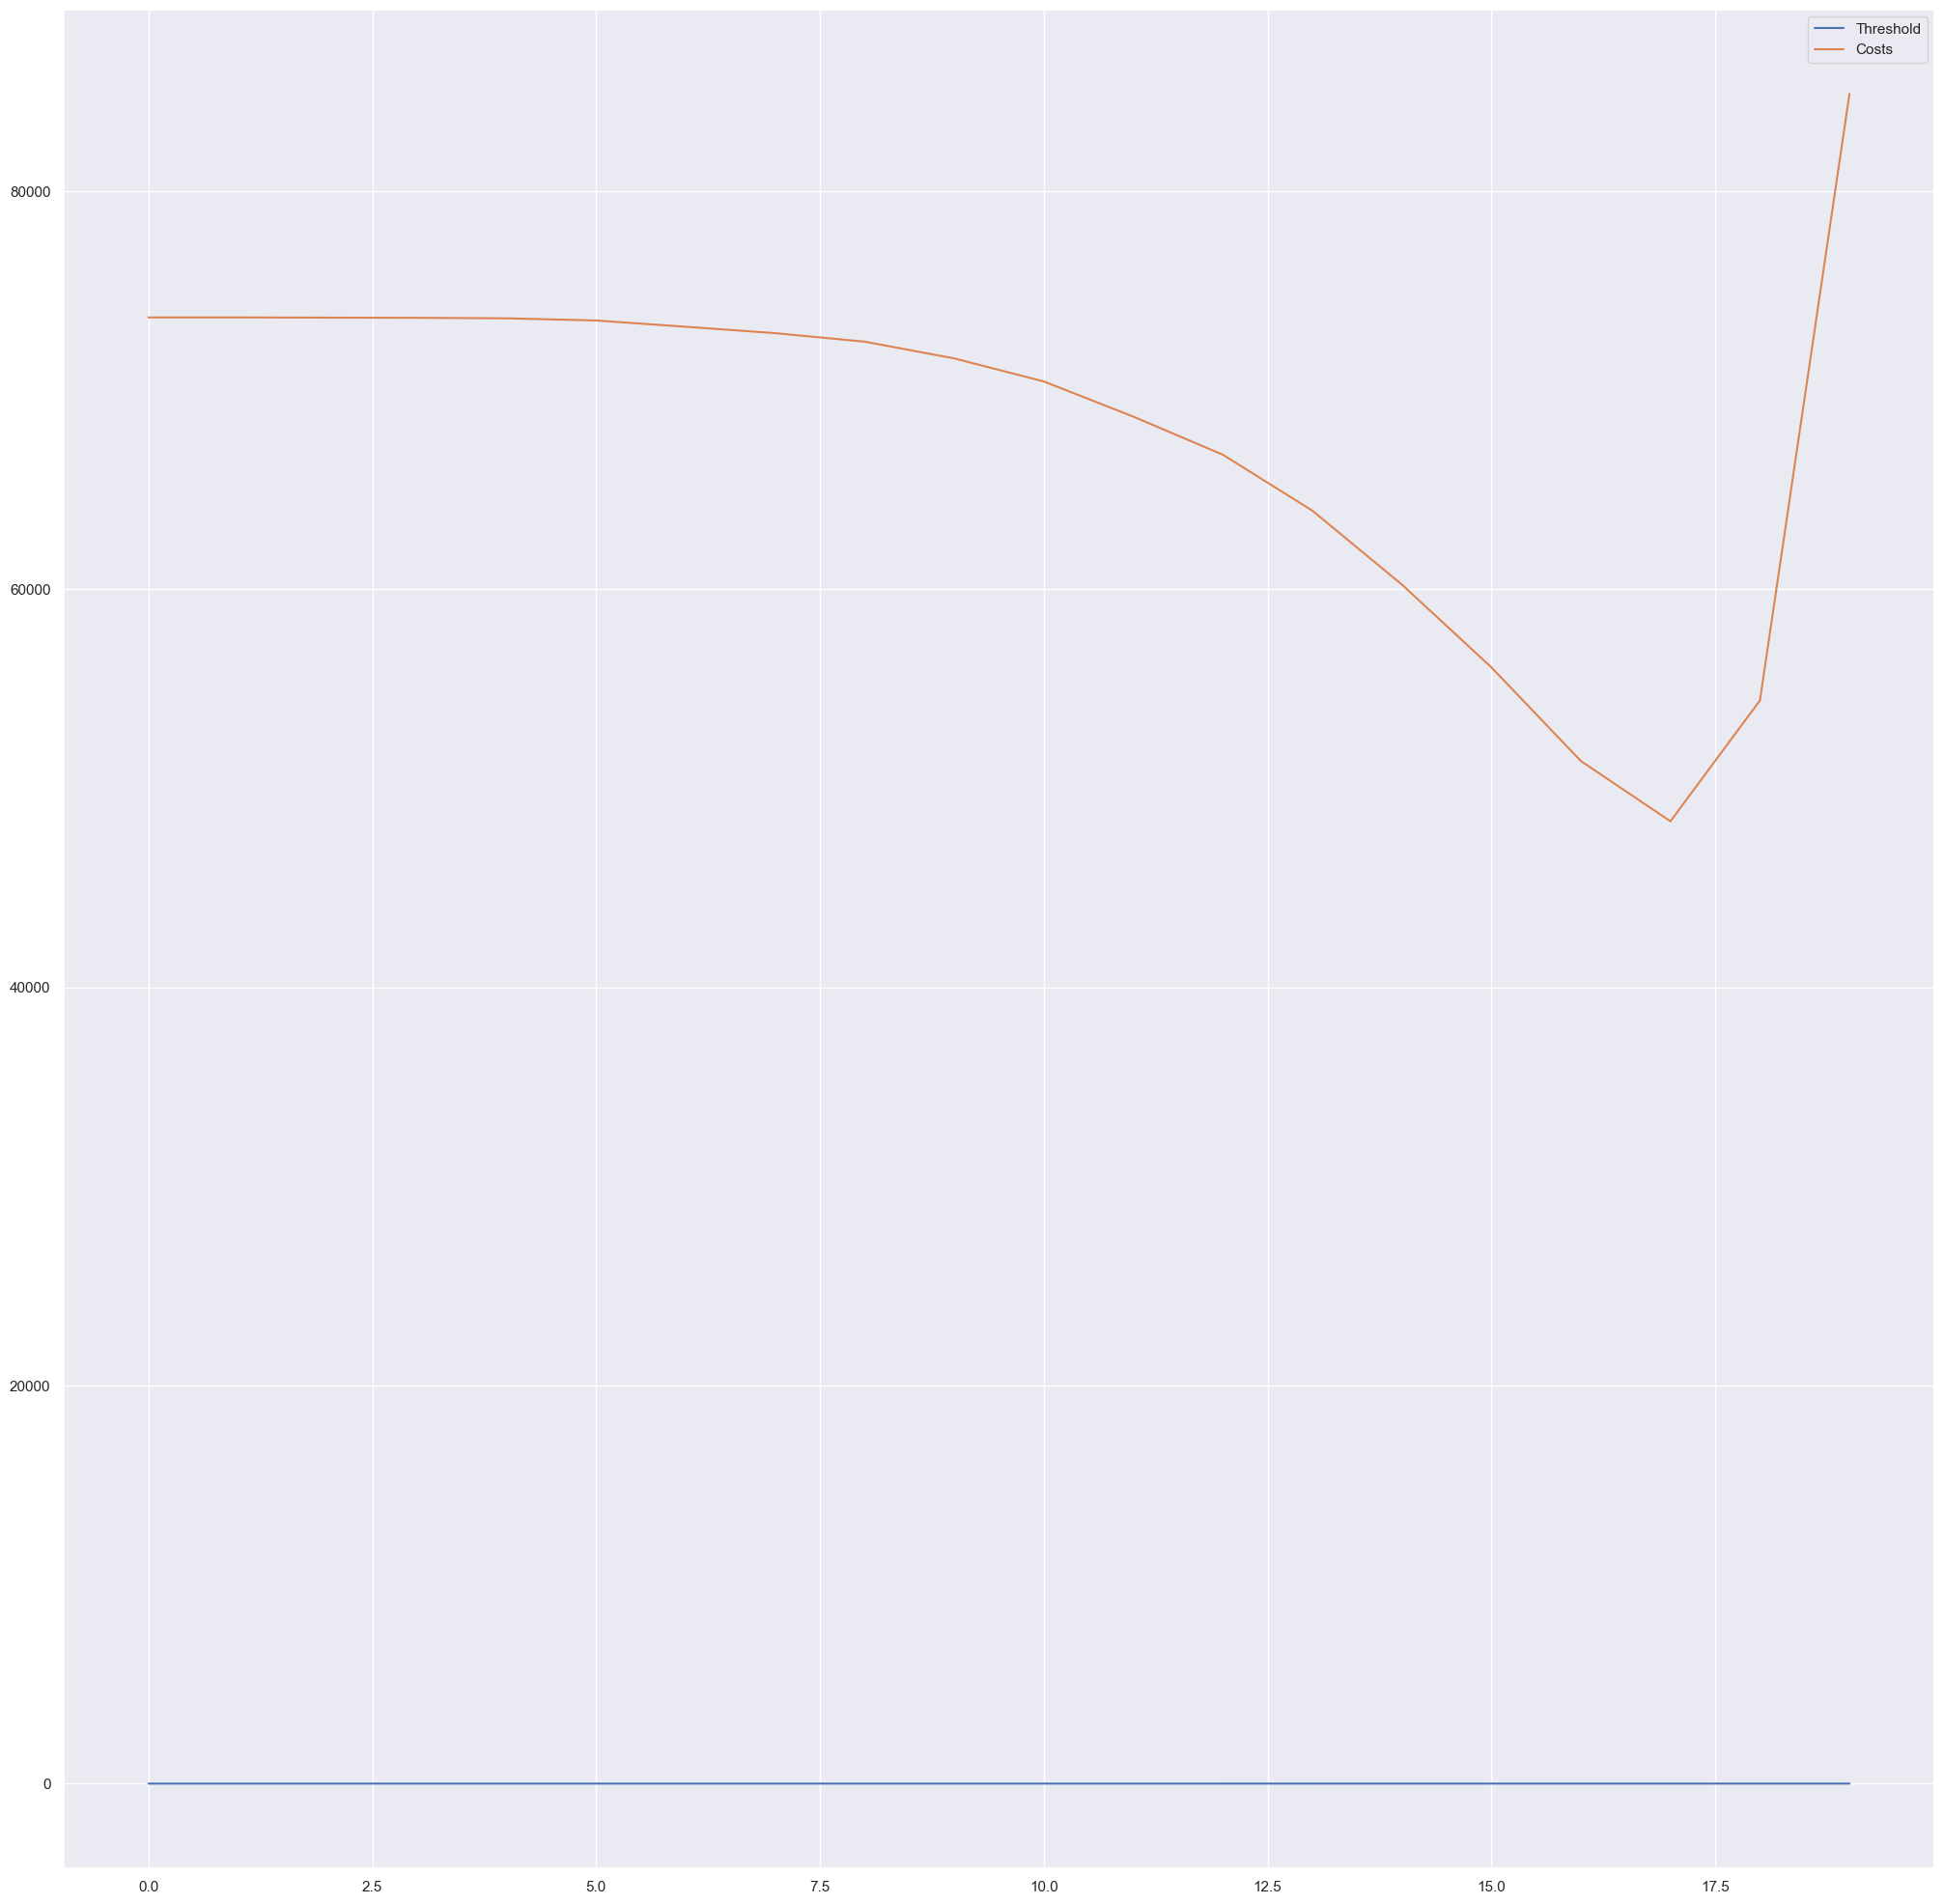

In [65]:
table_curve.plot()

### Shap

In [66]:
import shap
import shap.maskers
shap.initjs()  # JavaScript plots

In [67]:
explainer = shap.TreeExplainer(light_for_shap)
shap_values = explainer.shap_values(X_test_scaled)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [68]:
X_train_smote_df = pd.DataFrame(X_test_scaled, columns=features_colss)
# X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=features_colss)

#### Force plot

In [69]:
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X_train_smote_df.iloc[0,:])

In [70]:
shap.waterfall_plot(shap_values) # importance par observation on en a besoin

AttributeError: 'list' object has no attribute 'base_values'

#### Waterfall plot

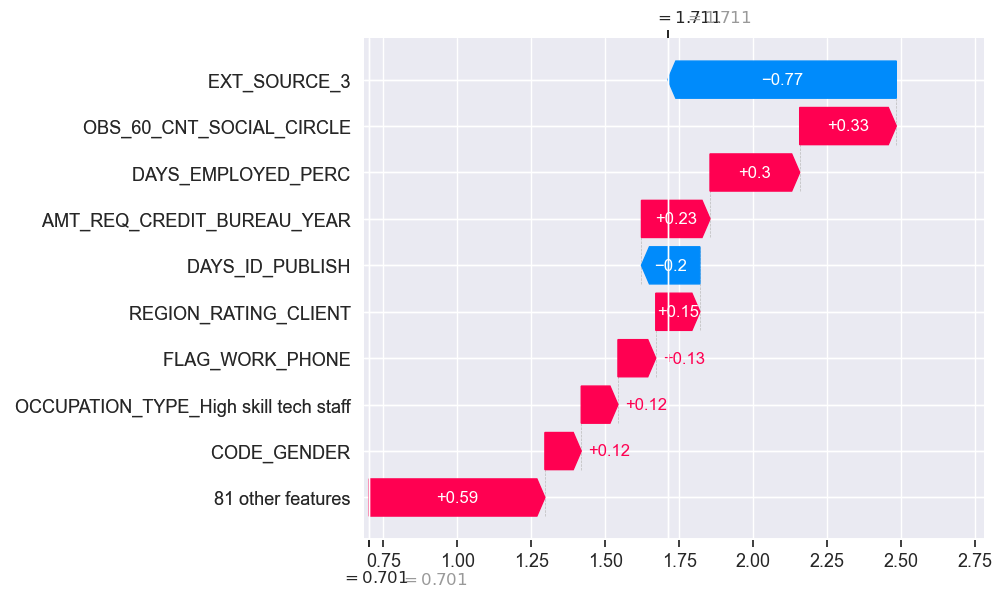

In [71]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value[0], shap_values[0][0], X_test_scaled[0], features_colss)

#### Summary plot

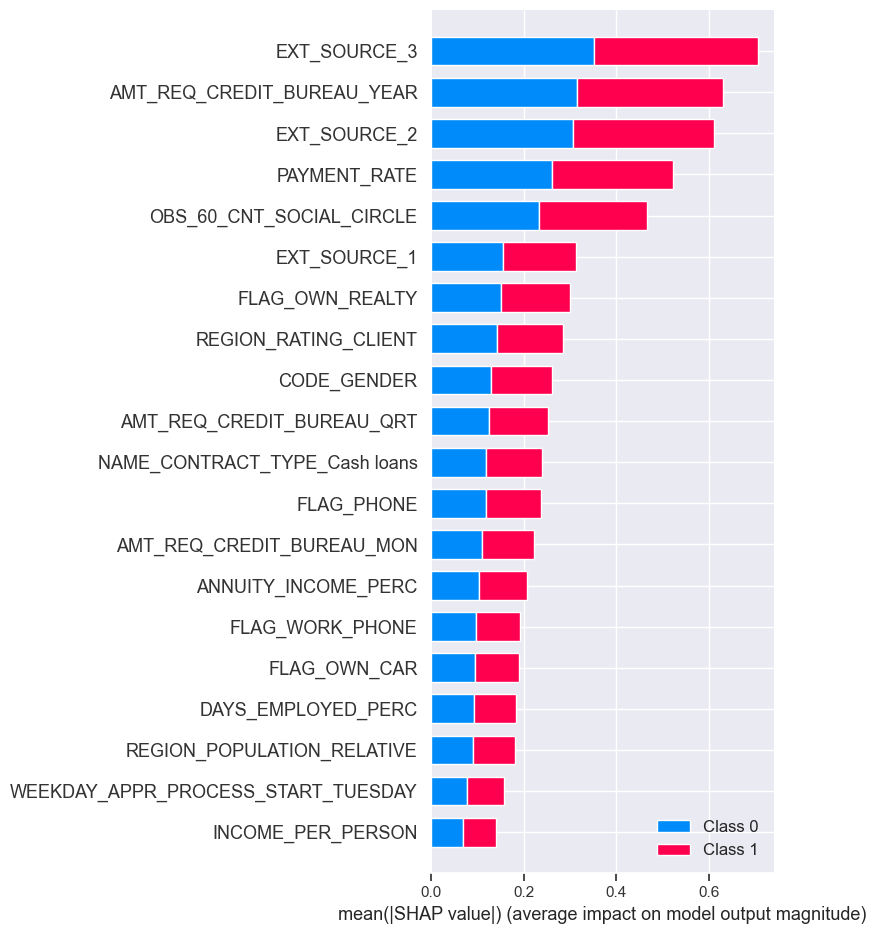

In [72]:
shap.summary_plot(shap_values, features_colss)

In [73]:
shap.force_plot(explainer.expected_value[1], shap_values[1][:500,:], X_train_smote_df.iloc[:500,:])

### Stocking objects into JOBLIB files

In [280]:
import joblib

In [285]:
joblib.dump (features_colss,'features.joblib')

['features.joblib']

In [286]:
joblib.dump(X_test_scaled, 'test_data.joblib') # see if it s ok to import directly standardized data, in order to avoid scaling them for each entry in the dashboard

['test_data.joblib']

In [281]:
joblib.dump(scaler, 'standardscaler.joblib')

['standardscaler.joblib']

In [282]:
joblib.dump(light_for_shap, 'lightgbmodel.joblib')

['lightgbmodel.joblib']

In [288]:
joblib.dump(X_test, "input_data.joblib")

['input_data.joblib']

In [337]:
def get_client(x_test):
    features_list=[]
    values_list=[]
    for k,v in x_test.sample().to_dict().items():
        features_list.append(k)
        for key,val in v.items():
            values_list.append(val)

    return dict(zip(features_list, values_list))


In [338]:
get_client(X_test)

{'CODE_GENDER': 1,
 'FLAG_OWN_CAR': 1,
 'FLAG_OWN_REALTY': 0,
 'REGION_POPULATION_RELATIVE': 0.0228,
 'DAYS_REGISTRATION': -5291.0,
 'DAYS_ID_PUBLISH': -3558,
 'FLAG_WORK_PHONE': 0,
 'FLAG_PHONE': 0,
 'REGION_RATING_CLIENT': 2,
 'REG_REGION_NOT_LIVE_REGION': 0,
 'REG_REGION_NOT_WORK_REGION': 0,
 'REG_CITY_NOT_LIVE_CITY': 0,
 'REG_CITY_NOT_WORK_CITY': 0,
 'EXT_SOURCE_1': 0.0,
 'EXT_SOURCE_2': 0.4416097234706632,
 'EXT_SOURCE_3': 0.1198779608955348,
 'BASEMENTAREA_MODE': 0.0,
 'ELEVATORS_MODE': 0.0,
 'LANDAREA_MODE': 0.0,
 'OBS_60_CNT_SOCIAL_CIRCLE': 3.0,
 'DEF_60_CNT_SOCIAL_CIRCLE': 1.0,
 'FLAG_DOCUMENT_2': 0,
 'AMT_REQ_CREDIT_BUREAU_MON': 0.0,
 'AMT_REQ_CREDIT_BUREAU_QRT': 0.0,
 'AMT_REQ_CREDIT_BUREAU_YEAR': 3.0,
 'NAME_CONTRACT_TYPE_Cash loans': 1,
 'NAME_CONTRACT_TYPE_Revolving loans': 0,
 'NAME_INCOME_TYPE_Commercial associate': 0,
 'NAME_INCOME_TYPE_Maternity leave': 0,
 'NAME_INCOME_TYPE_Pensioner': 0,
 'NAME_INCOME_TYPE_State servant': 0,
 'NAME_INCOME_TYPE_Unemployed': 0,
 'NAME

In [306]:
list_entry = X_test.sample().values
list_entry

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         6.85200000e-03, -4.67400000e+03, -4.73200000e+03,
         0.00000000e+00,  0.00000000e+00,  3.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  5.53215004e-02,
         0.00000000e+00,  9.28000000e-02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+0

In [302]:
ls

 Volume in drive C is Amadeus
 Volume Serial Number is EE3D-C9E7

 Directory of C:\Users\sfranze\OneDrive - Amadeus Workplace\OC\Proj7\Implementez_un_modele_de_scoring\data\Projet_Mise_en_prod_home_credit_default_risk

21/02/2023  11:24 pm    <DIR>          .
21/02/2023  11:24 pm    <DIR>          ..
30/12/2022  10:09 am       166,133,370 application_train.csv
21/02/2023  11:29 pm    <DIR>          Fast_api
20/02/2023  10:07 pm             3,537 features.joblib
30/12/2022  10:09 am            37,383 HomeCredit_columns_description.csv
21/02/2023  11:24 pm        27,773,003 input_data.joblib
10/02/2023  11:40 am             5,005 install-pyenv-win.ps1
18/02/2023  05:26 pm           308,540 lightgbm.pkl
19/02/2023  07:03 pm           308,705 lightgbmodel.joblib
19/02/2023  07:03 pm             6,103 standardscaler.joblib
20/02/2023  10:07 pm        66,423,105 test_data.joblib
               9 File(s)    260,998,751 bytes
               3 Dir(s)  217,653,706,752 bytes free


premierment mlflow
api est un endpoint
dashboard

In [ ]:
import pandas_profiling

In [ ]:
# pandas_profiling.ProfileReport(train_df)

In [ ]:
! pip freeze